### Îç∞Ïù¥ÌÑ∞ Î°úÎìú Î∞è Ï†ÑÏ≤òÎ¶¨

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib as mpl

In [479]:
df = pd.read_csv('./archive/retail_store_inventory.csv')
df.head(3)

Date Store ID Product ID   Category Region  Inventory Level  \
0  2022-01-01     S001      P0001  Groceries  North              231   
1  2022-01-01     S001      P0002       Toys  South              204   
2  2022-01-01     S001      P0003       Toys   West              102   

   Units Sold  Units Ordered  Demand Forecast  Price  Discount  \
0         127             55           135.47  33.50        20   
1         150             66           144.04  63.01        20   
2          65             51            74.02  27.99        10   

  Weather Condition  Holiday/Promotion  Competitor Pricing Seasonality  
0             Rainy                  0               29.69      Autumn  
1             Sunny                  0               66.16      Autumn  
2             Sunny                  1               31.32      Summer

In [480]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73100 entries, 0 to 73099
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                73100 non-null  object 
 1   Store ID            73100 non-null  object 
 2   Product ID          73100 non-null  object 
 3   Category            73100 non-null  object 
 4   Region              73100 non-null  object 
 5   Inventory Level     73100 non-null  int64  
 6   Units Sold          73100 non-null  int64  
 7   Units Ordered       73100 non-null  int64  
 8   Demand Forecast     73100 non-null  float64
 9   Price               73100 non-null  float64
 10  Discount            73100 non-null  int64  
 11  Weather Condition   73100 non-null  object 
 12  Holiday/Promotion   73100 non-null  int64  
 13  Competitor Pricing  73100 non-null  float64
 14  Seasonality         73100 non-null  object 
dtypes: float64(3), int64(5), object(7)
memory usage: 8.4+

In [482]:
df.loc[(df['Store ID'] == 'S001')&(df['Product ID'] == 'P0001')&(df['Category'] == 'Groceries')]

Date Store ID Product ID   Category Region  Inventory Level  \
0      2022-01-01     S001      P0001  Groceries  North              231   
100    2022-01-02     S001      P0001  Groceries   West              116   
300    2022-01-04     S001      P0001  Groceries  South               85   
400    2022-01-05     S001      P0001  Groceries  South              238   
1400   2022-01-15     S001      P0001  Groceries  North              290   
...           ...      ...        ...        ...    ...              ...   
70100  2023-12-03     S001      P0001  Groceries  South              482   
70600  2023-12-08     S001      P0001  Groceries   East              383   
71500  2023-12-17     S001      P0001  Groceries  North              307   
72400  2023-12-26     S001      P0001  Groceries   West              372   
72600  2023-12-28     S001      P0001  Groceries  North              104   

       Units Sold  Units Ordered  Demand Forecast  Price  Discount  \
0             127             55           135.47  33.50        20   
100            81            104            92.94  27.95        10   
300            58            193            52.87  77.88        15   
400           147             37           150.27  28.46        20   
1400          176             94           170.06  98.04        10   
...           ...            ...              ...    ...       ...   
70100         122             81           128.17  21.92         0   
70600         263             20           273.73  93.77        10   
71500          55            185            66.58  58.65        20   
72400          46            177            61.65  18.23         5   
72600          67             64            78.15  77.61         0   

      Weather Condition  Holiday/Promotion  Competitor Pricing Seasonality  
0                 Rainy                  0               29.69      Autumn  
100              Cloudy                  0               30.89      Spring  
300              Cloudy                  1               75.99      Winter  
400               Sunny                  1               29.40      Winter  
1400              Rainy                  1               98.20      Spring  
...                 ...                ...                 ...         ...  
70100             Sunny                  0               21.88      Spring  
70600             Rainy                  1               94.58      Spring  
71500            Cloudy                  0               54.37      Summer  
72400            Cloudy                  0               19.26      Autumn  
72600            Cloudy                  1               78.00      Spring  

[164 rows x 15 columns]

In [483]:
df['Date'] = pd.to_datetime(df['Date'])

In [484]:
df['Weekday'] = df['Date'].dt.day_name()
df

Date Store ID Product ID     Category Region  Inventory Level  \
0     2022-01-01     S001      P0001    Groceries  North              231   
1     2022-01-01     S001      P0002         Toys  South              204   
2     2022-01-01     S001      P0003         Toys   West              102   
3     2022-01-01     S001      P0004         Toys  North              469   
4     2022-01-01     S001      P0005  Electronics   East              166   
...          ...      ...        ...          ...    ...              ...   
73095 2024-01-01     S005      P0016    Furniture   East               96   
73096 2024-01-01     S005      P0017         Toys  North              313   
73097 2024-01-01     S005      P0018     Clothing   West              278   
73098 2024-01-01     S005      P0019         Toys   East              374   
73099 2024-01-01     S005      P0020    Groceries   East              117   

       Units Sold  Units Ordered  Demand Forecast  Price  Discount  \
0             127             55           135.47  33.50        20   
1             150             66           144.04  63.01        20   
2              65             51            74.02  27.99        10   
3              61            164            62.18  32.72        10   
4              14            135             9.26  73.64         0   
...           ...            ...              ...    ...       ...   
73095           8            127            18.46  73.73        20   
73096          51            101            48.43  82.57        10   
73097          36            151            39.65  11.11        10   
73098         264             21           270.52  53.14        20   
73099           6            165             2.33  78.39        20   

      Weather Condition  Holiday/Promotion  Competitor Pricing Seasonality  \
0                 Rainy                  0               29.69      Autumn   
1                 Sunny                  0               66.16      Autumn   
2                 Sunny                  1               31.32      Summer   
3                Cloudy                  1               34.74      Autumn   
4                 Sunny                  0               68.95      Summer   
...                 ...                ...                 ...         ...   
73095             Snowy                  0               72.45      Winter   
73096            Cloudy                  0               83.78      Autumn   
73097             Rainy                  0               10.91      Winter   
73098             Rainy                  0               55.80      Spring   
73099             Rainy                  1               79.52      Spring   

        Weekday  
0      Saturday  
1      Saturday  
2      Saturday  
3      Saturday  
4      Saturday  
...         ...  
73095    Monday  
73096    Monday  
73097    Monday  
73098    Monday  
73099    Monday  

[73100 rows x 16 columns]

- Í≥ÑÏ†à ÌäπÏÑ± Ï∂îÍ∞Ä

In [485]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

# Í≥ÑÏ†à Îß§Ìïë Ìï®Ïàò Ï†ïÏùò
def get_season(month):
    if month in [3, 4, 5]:
        return 'Spring'   # Î¥Ñ
    elif month in [6, 7, 8]:
        return 'Summer'   # Ïó¨Î¶Ñ
    elif month in [9, 10, 11]:
        return 'Autumn'   # Í∞ÄÏùÑ
    else:
        return 'Winter'   # Í≤®Ïö∏ (12, 1, 2)

# Í≥ÑÏ†à Ïª¨Îüº Ï∂îÍ∞Ä
df['Season'] = df['Month'].apply(get_season)

- Ìï†Ïù∏Îêú ÌåêÎß§ Í∏àÏï° Ïª¨Îüº Ï∂îÍ∞Ä

In [486]:
df['Sale Price'] = df['Price']*(1 - df['Discount']/100)
df.head()

Date Store ID Product ID     Category Region  Inventory Level  \
0 2022-01-01     S001      P0001    Groceries  North              231   
1 2022-01-01     S001      P0002         Toys  South              204   
2 2022-01-01     S001      P0003         Toys   West              102   
3 2022-01-01     S001      P0004         Toys  North              469   
4 2022-01-01     S001      P0005  Electronics   East              166   

   Units Sold  Units Ordered  Demand Forecast  Price  ...  Weather Condition  \
0         127             55           135.47  33.50  ...              Rainy   
1         150             66           144.04  63.01  ...              Sunny   
2          65             51            74.02  27.99  ...              Sunny   
3          61            164            62.18  32.72  ...             Cloudy   
4          14            135             9.26  73.64  ...              Sunny   

  Holiday/Promotion  Competitor Pricing  Seasonality   Weekday  Year  Month  \
0                 0               29.69       Autumn  Saturday  2022      1   
1                 0               66.16       Autumn  Saturday  2022      1   
2                 1               31.32       Summer  Saturday  2022      1   
3                 1               34.74       Autumn  Saturday  2022      1   
4                 0               68.95       Summer  Saturday  2022      1   

   Day  Season Sale Price  
0    1  Winter     26.800  
1    1  Winter     50.408  
2    1  Winter     25.191  
3    1  Winter     29.448  
4    1  Winter     73.640  

[5 rows x 21 columns]

- Í∞Å Ï†úÌíàÏùÑ ÎÇòÎàå product id, category Ìï≠Î™©ÏùÑ Ìï©Ïπú Ïª¨Îüº Ï∂îÍ∞Ä. (product idÍ∞Ä Î™®Îì† Ïπ¥ÌÖåÍ≥†Î¶¨Ïóê ÎèôÏùºÌï®.)

In [487]:
df['Product Classification'] = df['Category'] + "_" + df['Product ID'].astype(str)
df.head()

Date Store ID Product ID     Category Region  Inventory Level  \
0 2022-01-01     S001      P0001    Groceries  North              231   
1 2022-01-01     S001      P0002         Toys  South              204   
2 2022-01-01     S001      P0003         Toys   West              102   
3 2022-01-01     S001      P0004         Toys  North              469   
4 2022-01-01     S001      P0005  Electronics   East              166   

   Units Sold  Units Ordered  Demand Forecast  Price  ...  Holiday/Promotion  \
0         127             55           135.47  33.50  ...                  0   
1         150             66           144.04  63.01  ...                  0   
2          65             51            74.02  27.99  ...                  1   
3          61            164            62.18  32.72  ...                  1   
4          14            135             9.26  73.64  ...                  0   

  Competitor Pricing  Seasonality   Weekday  Year Month  Day  Season  \
0              29.69       Autumn  Saturday  2022     1    1  Winter   
1              66.16       Autumn  Saturday  2022     1    1  Winter   
2              31.32       Summer  Saturday  2022     1    1  Winter   
3              34.74       Autumn  Saturday  2022     1    1  Winter   
4              68.95       Summer  Saturday  2022     1    1  Winter   

   Sale Price Product Classification  
0      26.800        Groceries_P0001  
1      50.408             Toys_P0002  
2      25.191             Toys_P0003  
3      29.448             Toys_P0004  
4      73.640      Electronics_P0005  

[5 rows x 22 columns]

In [488]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73100 entries, 0 to 73099
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Date                    73100 non-null  datetime64[ns]
 1   Store ID                73100 non-null  object        
 2   Product ID              73100 non-null  object        
 3   Category                73100 non-null  object        
 4   Region                  73100 non-null  object        
 5   Inventory Level         73100 non-null  int64         
 6   Units Sold              73100 non-null  int64         
 7   Units Ordered           73100 non-null  int64         
 8   Demand Forecast         73100 non-null  float64       
 9   Price                   73100 non-null  float64       
 10  Discount                73100 non-null  int64         
 11  Weather Condition       73100 non-null  object        
 12  Holiday/Promotion       73100 non-null  int64 

#### EDA
0) Ï†ÑÎ∞òÏ†ÅÏù∏ ÌåêÎß§Îüâ Ï∂îÏù¥ ÌååÏïÖ
1) Í∞ÄÍ≤©Í≥º ÌåêÎß§Îüâ Í¥ÄÍ≥Ñ ÌÉêÏÉâ
2) Ìï†Ïù∏Ïú® Ìö®Í≥º Î∂ÑÏÑù
3) Í≤ΩÏüÅÏÇ¨ Í∞ÄÍ≤© Ìö®Í≥º
4) ÏãúÏ¶åÏÑ± Î∞è Í∏∞ÌÉÄ Îã§Î•∏ ÏöîÏù∏Í≥ºÏùò Í¥ÄÍ≥ÑÏÑ±

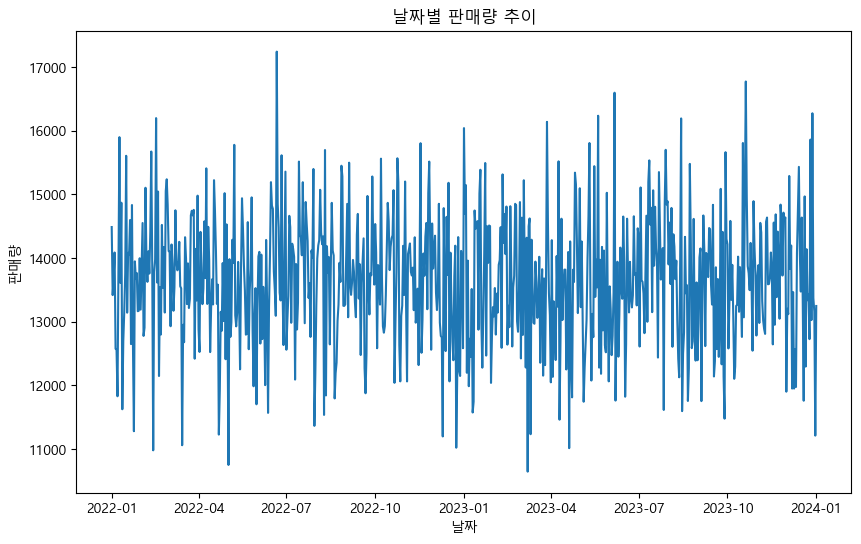

In [489]:
# ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï
mpl.rc('font', family='Malgun Gothic')
mpl.rcParams['axes.unicode_minus'] = False

# ÎÇ†ÏßúÎ≥Ñ ÌåêÎß§Îüâ
daily_sales = df.groupby('Date')['Units Sold'].sum().reset_index()

plt.figure(figsize=(10,6))
plt.plot(daily_sales['Date'], daily_sales['Units Sold'])
plt.title('ÎÇ†ÏßúÎ≥Ñ ÌåêÎß§Îüâ Ï∂îÏù¥')
plt.xlabel('ÎÇ†Ïßú')
plt.ylabel('ÌåêÎß§Îüâ')
plt.show()

In [490]:
filtered_list = []

for r in df['Date'].unique():
    temp_df = df[df['Date'] == r]
    Q1 = temp_df['Units Sold'].quantile(0.25)
    Q3 = temp_df['Units Sold'].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

     # Ïù¥ÏÉÅÏπò Ï†úÍ±∞
    filtered = temp_df[(temp_df['Units Sold'] >= lower_bound) & (temp_df['Units Sold'] <= upper_bound)]
    filtered_list.append(filtered)

df = pd.concat(filtered_list, ignore_index=True)

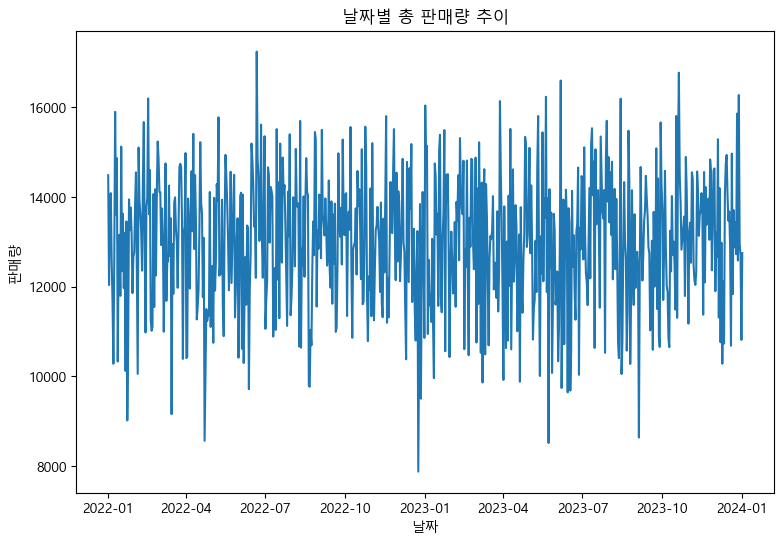

In [491]:
# ÎÇ†ÏßúÎ≥Ñ ÌåêÎß§Îüâ
daily_sales = df.groupby('Date')['Units Sold'].sum().reset_index()

plt.figure(figsize=(9,6))
plt.plot(daily_sales['Date'], daily_sales['Units Sold'])
plt.title('ÎÇ†ÏßúÎ≥Ñ Ï¥ù ÌåêÎß§Îüâ Ï∂îÏù¥')
plt.xlabel('ÎÇ†Ïßú')
plt.ylabel('ÌåêÎß§Îüâ')
plt.show()

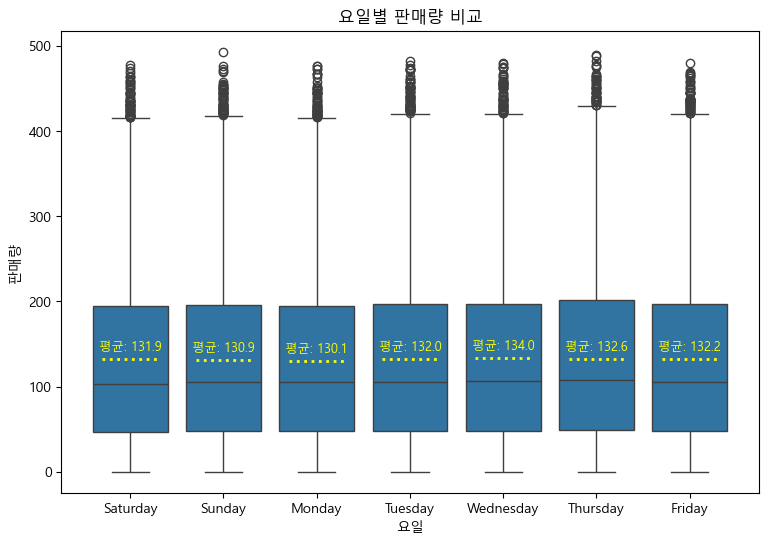

In [492]:
# ÏöîÏùºÎ≥Ñ ÌåêÎß§Îüâ
plt.figure(figsize=(9,6))
sns.boxplot(data=df, x=df['Weekday'], y=df['Units Sold'])

# ÏöîÏùºÎ≥Ñ ÌèâÍ∑† Í≥ÑÏÇ∞
weekday_means = df.groupby('Weekday')['Units Sold'].mean()

# Í∑∏ÎûòÌîÑÏóê ÌÖçÏä§Ìä∏Î°ú ÌëúÏãú
for i, mean in enumerate(weekday_means):
    plt.text(i, mean + 10, f'ÌèâÍ∑†: {mean:.1f}', color='yellow', ha='center', fontsize=9)
    plt.hlines(y=mean, xmin=i-0.3, xmax=i+0.3, colors='yellow', linestyles='dotted', linewidth=2)

plt.title('ÏöîÏùºÎ≥Ñ ÌåêÎß§Îüâ ÎπÑÍµê')
plt.xlabel('ÏöîÏùº')
plt.ylabel('ÌåêÎß§Îüâ')
plt.show()

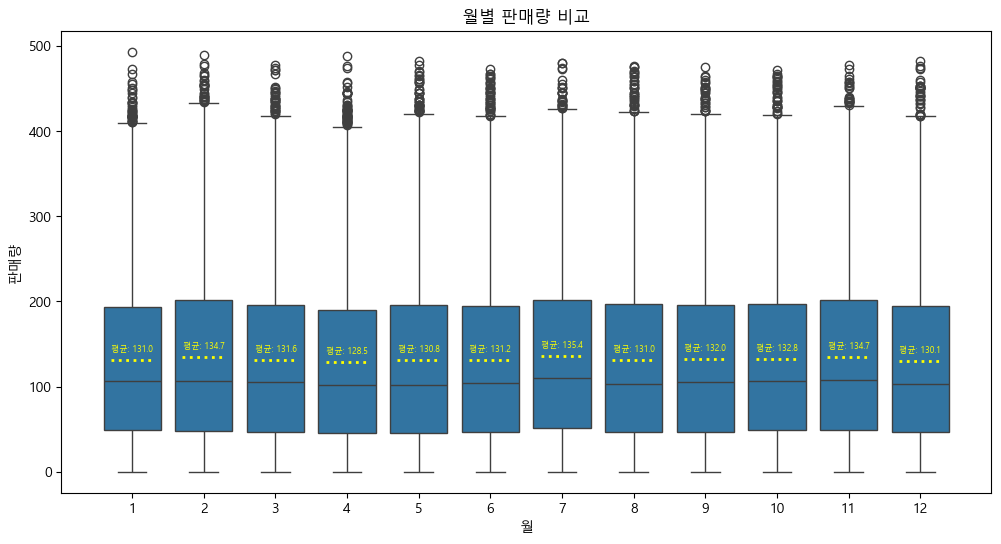

In [493]:
# ÏõîÎ≥Ñ ÌåêÎß§Îüâ
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x=df['Month'], y=df['Units Sold'])

# ÏöîÏùºÎ≥Ñ ÌèâÍ∑† Í≥ÑÏÇ∞
weekday_means = df.groupby('Month')['Units Sold'].mean()

# Í∑∏ÎûòÌîÑÏóê ÌÖçÏä§Ìä∏Î°ú ÌëúÏãú
for i, mean in enumerate(weekday_means):
    plt.text(i, mean + 10, f'ÌèâÍ∑†: {mean:.1f}', color='yellow', ha='center', fontsize=6)
    plt.hlines(y=mean, xmin=i-0.3, xmax=i+0.3, colors='yellow', linestyles='dotted', linewidth=2)

plt.title('ÏõîÎ≥Ñ ÌåêÎß§Îüâ ÎπÑÍµê')
plt.xlabel('Ïõî')
plt.ylabel('ÌåêÎß§Îüâ')
plt.show()

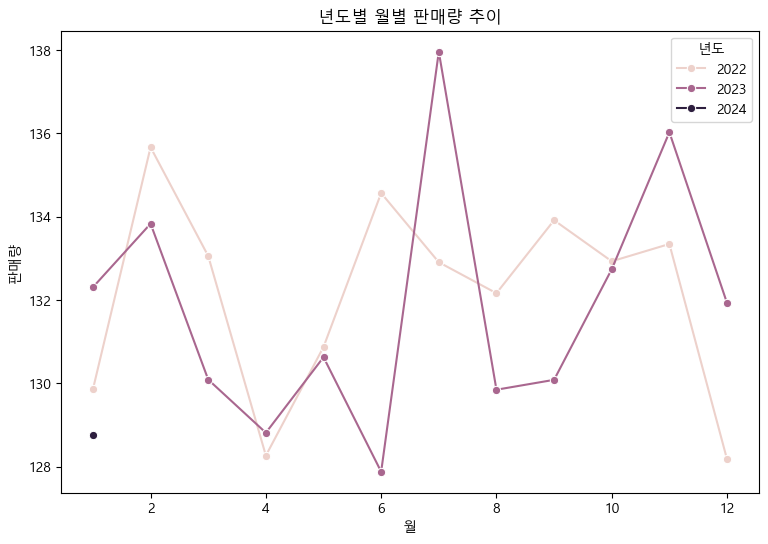

In [494]:
monthly_sales = df.groupby(['Year','Month'])['Units Sold'].mean().reset_index()

plt.figure(figsize=(9,6))
sns.lineplot(data=monthly_sales, x='Month', y='Units Sold', hue='Year', marker='o')
plt.title('ÎÖÑÎèÑÎ≥Ñ ÏõîÎ≥Ñ ÌåêÎß§Îüâ Ï∂îÏù¥')
plt.xlabel('Ïõî')
plt.ylabel('ÌåêÎß§Îüâ')
plt.legend(title='ÎÖÑÎèÑ')
plt.show()

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_26672\702804222.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Category', y='Units Sold', estimator='mean', palette='Set2')


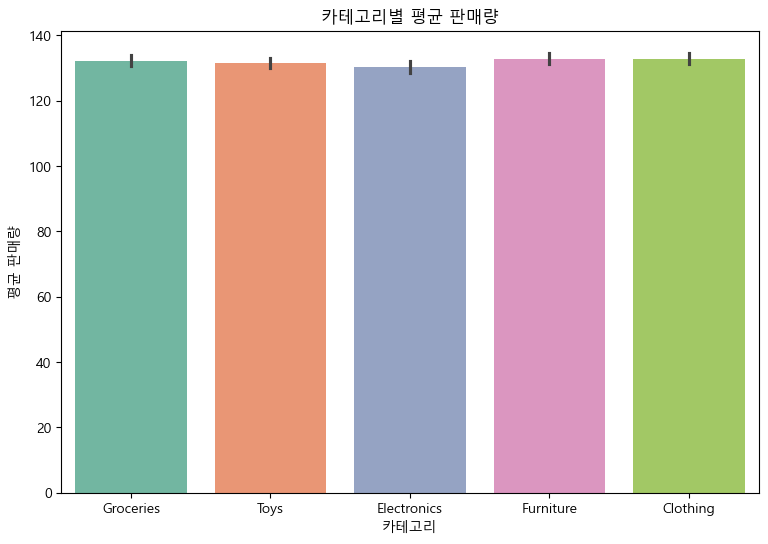

In [495]:
plt.figure(figsize=(9,6))
sns.barplot(data=df, x='Category', y='Units Sold', estimator='mean', palette='Set2')
plt.title('Ïπ¥ÌÖåÍ≥†Î¶¨Î≥Ñ ÌèâÍ∑† ÌåêÎß§Îüâ')
plt.xlabel('Ïπ¥ÌÖåÍ≥†Î¶¨')
plt.ylabel('ÌèâÍ∑† ÌåêÎß§Îüâ')
plt.show()

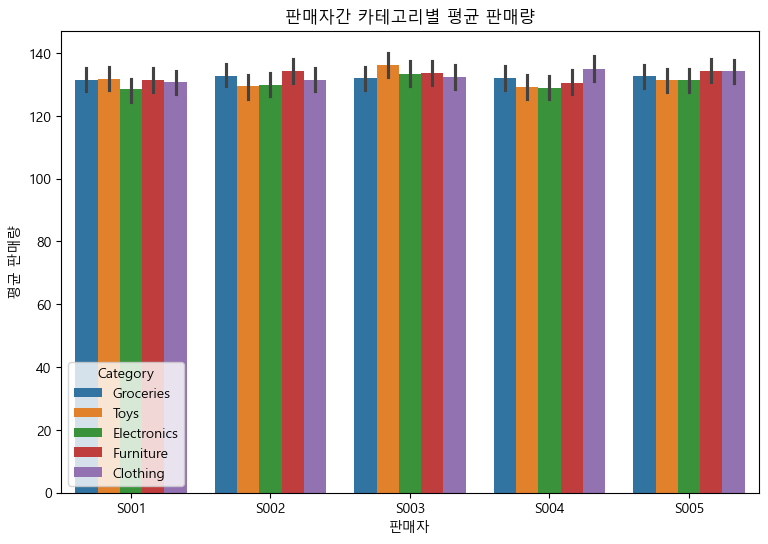

In [497]:
plt.figure(figsize=(9,6))
sns.barplot(data=df, x='Store ID', y='Units Sold', estimator='mean', hue='Category')
plt.title('ÌåêÎß§ÏûêÍ∞Ñ Ïπ¥ÌÖåÍ≥†Î¶¨Î≥Ñ ÌèâÍ∑† ÌåêÎß§Îüâ')
plt.xlabel('ÌåêÎß§Ïûê')
plt.ylabel('ÌèâÍ∑† ÌåêÎß§Îüâ')
plt.show()

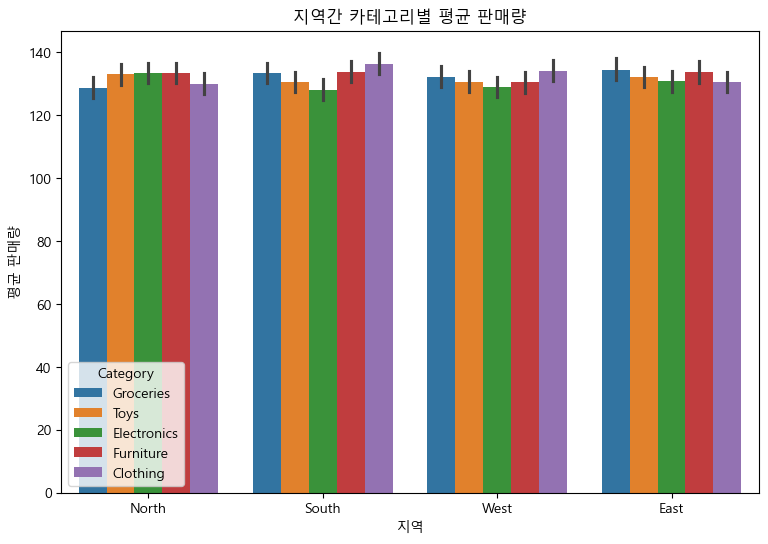

In [496]:
plt.figure(figsize=(9,6))
sns.barplot(data=df, x='Region', y='Units Sold', estimator='mean', hue='Category')
plt.title('ÏßÄÏó≠Í∞Ñ Ïπ¥ÌÖåÍ≥†Î¶¨Î≥Ñ ÌèâÍ∑† ÌåêÎß§Îüâ')
plt.xlabel('ÏßÄÏó≠')
plt.ylabel('ÌèâÍ∑† ÌåêÎß§Îüâ')
plt.show()

In [214]:
len(df[df['Units Sold'] < 200])/72000

0.7555

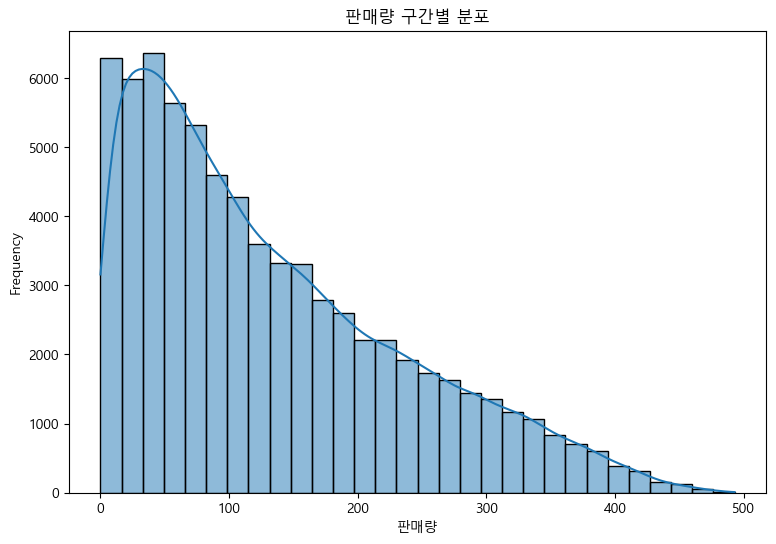

In [498]:
plt.figure(figsize=(9,6))
sns.histplot(df['Units Sold'], kde=True, bins=30) # edgecolor=True/None
plt.title('ÌåêÎß§Îüâ Íµ¨Í∞ÑÎ≥Ñ Î∂ÑÌè¨')
plt.xlabel('ÌåêÎß§Îüâ')
plt.ylabel('Frequency')
plt.show()

- ÌÉÄÍ≤üÏúºÎ°úÌïòÎäî ÌåêÎß§ÎüâÏùò Î∂ÑÌè¨Í∞Ä 200 Ïù¥Ìïò Í∞íÏóê ÏßÄÎÇòÏπòÍ≤å Î∞ÄÏßëÎêòÏñ¥ÏûàÏñ¥ Ï∂îÌõÑ Î™®Îç∏ ÏòàÏ∏°Í∞íÏù¥ Ìï¥Îãπ Î≤îÏúÑÎ°úÎßå Î®∏Î¨¥Î•º Ïàò ÏûàÎã§.
- Ïù¥Î•º Ìï¥Í≤∞ÌïòÍ∏∞ ÏúÑÌï¥ Î°úÍ∑∏ Î≥ÄÌôò

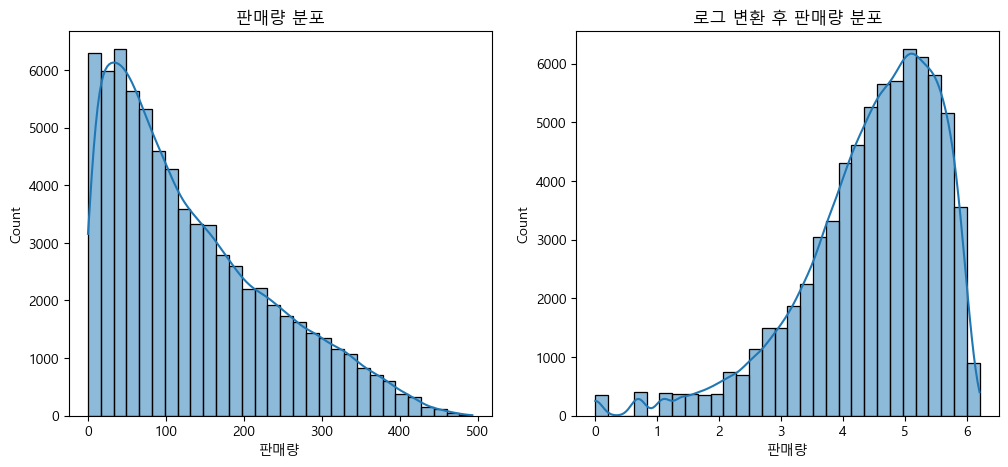

In [499]:
plt.figure(figsize=(12,5))

# ÏõêÎ≥∏ Î∂ÑÌè¨
plt.subplot(1,2,1)
sns.histplot(df['Units Sold'], bins=30, kde=True)
plt.xlabel('ÌåêÎß§Îüâ')
plt.title('ÌåêÎß§Îüâ Î∂ÑÌè¨')

# Î°úÍ∑∏ Î≥ÄÌôò ÌõÑ Î∂ÑÌè¨
plt.subplot(1,2,2)
sns.histplot(np.log1p(df['Units Sold']), bins=30, kde=True)
plt.xlabel('ÌåêÎß§Îüâ')
plt.title('Î°úÍ∑∏ Î≥ÄÌôò ÌõÑ ÌåêÎß§Îüâ Î∂ÑÌè¨')

plt.show()

In [500]:
len(df[np.log1p(df['Units Sold']) <=2])

2610

#### 1) Í∞ÄÍ≤©Í≥º ÌåêÎß§Îüâ Í¥ÄÍ≥Ñ ÌÉêÏÉâ
- ÎÇÆÏùÄ Í∞ÄÍ≤©ÎåÄÏóêÏÑú ÌåêÎß§Í∞Ä Îçî ÎßéÏù¥ Î∞úÏÉùÌï† Í≤ÉÏù¥ÎùºÎäî Í∞ÄÏÑ§Í≥º Îã¨Î¶¨ ÎÜíÏùÄ Í∞ÄÍ≤©ÎåÄÏóêÏÑúÎèÑ ÏùºÏ†ïÌïú ÌåêÎß§ÎüâÏùÑ Î≥¥ÏûÑ
- Ï†ÑÏûêÍ∏∞Í∏∞Îäî ÎÜíÏùÄ Í∏àÏï°ÏóêÏÑú ÌåêÎß§ÎüâÏù¥ Í∏âÍ≤©Ìûà Îñ®Ïñ¥ÏßÄÎäî Í≤ÉÏúºÎ°ú Î≥¥ÏïÑ Í∞ÄÍ≤© ÎØºÍ∞êÎèÑÍ∞Ä ÎÜíÏùÄ ÌíàÎ™©
- Í∞ÄÍµ¨ÎÇò ÏïÖÏÑ∏ÏÑúÎ¶¨Îäî Í≥†Í∞ÄÏóêÏÑúÎèÑ ÌåêÎß§ÎüâÏù¥ Ï¶ùÍ∞ÄÌïòÎäî Í≤ÉÏúºÎ°ú Î≥¥ÏïÑ Î∏åÎûúÎìúÎÇò Ï†úÌíàÏùò ÌäπÏÑ±Ïùò ÏòÅÌñ•ÏùÑ ÎßéÏù¥ Î∞õÏùÑ Í≤ÉÏúºÎ°ú ÌåêÎã®Îê®.
- ÎåÄÎ∂ÄÎ∂ÑÏùò ÏÉÅÌíàÏùÄ Í∞ÄÍ≤© Î≥ÄÌôîÏóê ÌÅ¨Í≤å ÎØºÍ∞êÌïòÏßÄ ÏïäÍ≥†, ÏùºÎ∂Ä Í≥†Í∞Ä Ï†úÌíà(Electronics)Îßå Í∞ÄÍ≤©Ïóê Îî∞Îùº ÌåêÎß§ÎüâÏù¥ Î≥ÄÌïúÎã§. Îî∞ÎùºÏÑú Í∞ÄÍ≤© ÏµúÏ†ÅÌôî Ï†ÑÎûµÏùÑ ÏÑ∏Ïö∏ Îïå Ïπ¥ÌÖåÍ≥†Î¶¨ÏôÄ Ï†úÌíà ÌäπÏÑ±ÏùÑ Î∞òÎìúÏãú Í≥†Î†§Ìï† ÌïÑÏöîÍ∞Ä ÏûàÏùå.

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_26672\4054893194.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_sales = temp_df.groupby(["Category", "sale_price_bin"])["Units Sold"].mean().reset_index()


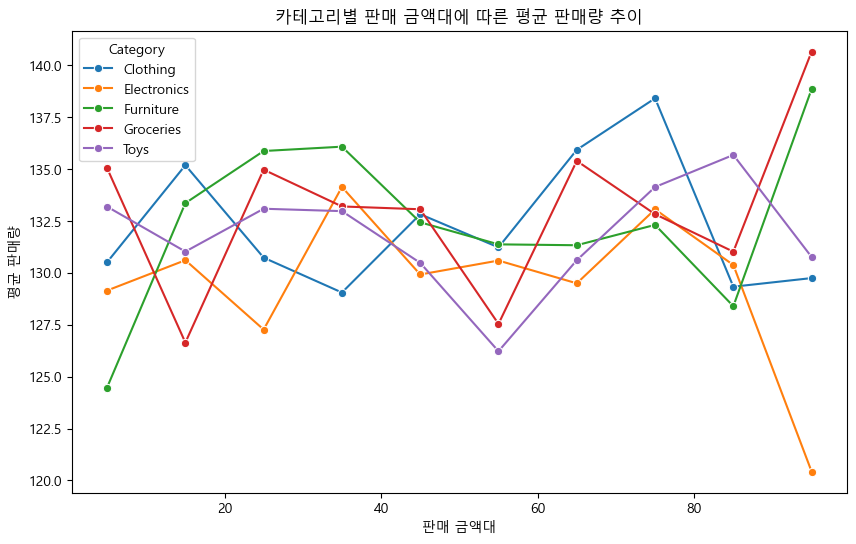

In [501]:
temp_df = df.copy()
temp_df["sale_price_bin"] = pd.cut(temp_df["Sale Price"], bins=range(0, int(temp_df["Sale Price"].max())+10, 10))
avg_sales = temp_df.groupby(["Category", "sale_price_bin"])["Units Sold"].mean().reset_index()

# Íµ¨Í∞ÑÏùò Ï§ëÏïôÍ∞íÏùÑ ÏÉàÎ°úÏö¥ Ïª¨ÎüºÏúºÎ°ú ÎßåÎì§Ïñ¥ÏÑú Ïà´ÏûêÌôî
avg_sales["sale_price_mid"] = avg_sales["sale_price_bin"].apply(lambda x: x.mid)
avg_sales['Units Sold'] = avg_sales['Units Sold'].fillna(0)

plt.figure(figsize=(10,6))
sns.lineplot(data=avg_sales, x="sale_price_mid", y="Units Sold", hue="Category", marker="o")
plt.title("Ïπ¥ÌÖåÍ≥†Î¶¨Î≥Ñ ÌåêÎß§ Í∏àÏï°ÎåÄÏóê Îî∞Î•∏ ÌèâÍ∑† ÌåêÎß§Îüâ Ï∂îÏù¥")
plt.xlabel('ÌåêÎß§ Í∏àÏï°ÎåÄ')
plt.ylabel('ÌèâÍ∑† ÌåêÎß§Îüâ')
plt.show()

In [502]:
temp_df["Category"]

0          Groceries
1               Toys
2               Toys
3               Toys
4        Electronics
            ...     
71970      Furniture
71971           Toys
71972       Clothing
71973           Toys
71974      Groceries
Name: Category, Length: 71975, dtype: object

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_26672\1428865812.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_sales = temp_df.loc[temp_df["Category"]=='Electronics'].groupby(["Product Classification", "sale_price_bin"])["Units Sold"].mean().reset_index()


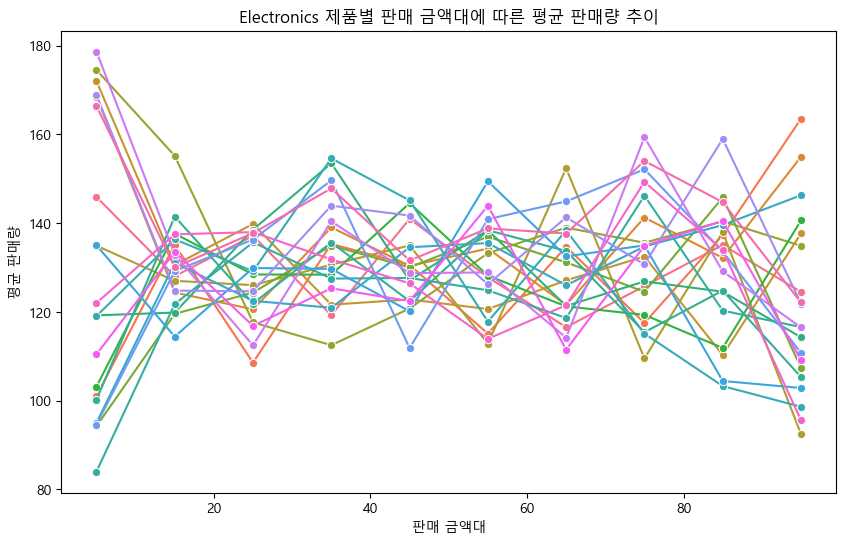

In [507]:
temp_df = df.copy()
temp_df["sale_price_bin"] = pd.cut(temp_df["Sale Price"], bins=range(0, int(temp_df["Sale Price"].max())+10, 10))
avg_sales = temp_df.loc[temp_df["Category"]=='Electronics'].groupby(["Product Classification", "sale_price_bin"])["Units Sold"].mean().reset_index()

# Íµ¨Í∞ÑÏùò Ï§ëÏïôÍ∞íÏùÑ ÏÉàÎ°úÏö¥ Ïª¨ÎüºÏúºÎ°ú ÎßåÎì§Ïñ¥ÏÑú Ïà´ÏûêÌôî
avg_sales["sale_price_mid"] = avg_sales["sale_price_bin"].apply(lambda x: x.mid)
avg_sales['Units Sold'] = avg_sales['Units Sold'].fillna(0)

plt.figure(figsize=(10,6))
sns.lineplot(data=avg_sales, x="sale_price_mid", y="Units Sold", hue='Product Classification', marker="o")
# Î≤îÎ°Ä Ï†úÍ±∞
plt.legend().remove()
plt.title("Electronics Ï†úÌíàÎ≥Ñ ÌåêÎß§ Í∏àÏï°ÎåÄÏóê Îî∞Î•∏ ÌèâÍ∑† ÌåêÎß§Îüâ Ï∂îÏù¥")
plt.xlabel('ÌåêÎß§ Í∏àÏï°ÎåÄ')
plt.ylabel('ÌèâÍ∑† ÌåêÎß§Îüâ')
plt.show()

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_26672\1882285323.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_sales = temp_df.loc[temp_df["Category"]=='Toys'].groupby(["Product Classification", "sale_price_bin"])["Units Sold"].mean().reset_index()


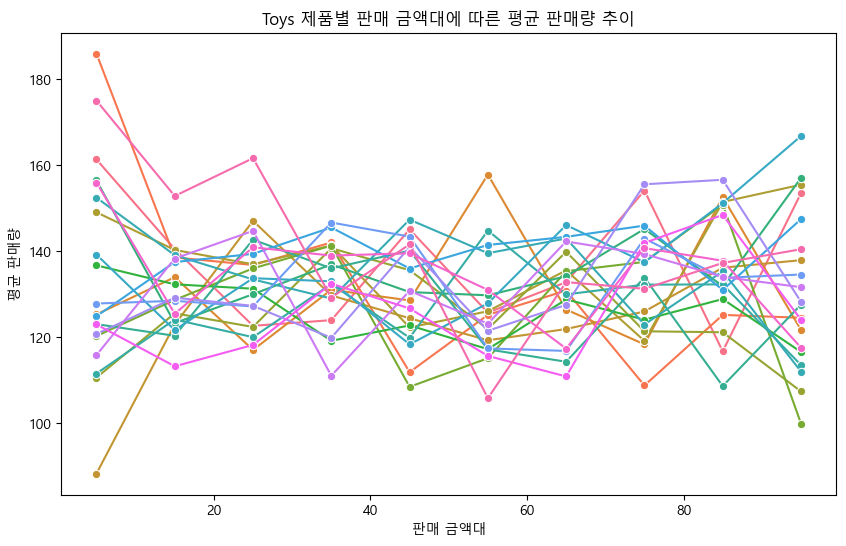

In [504]:
temp_df = df.copy()
temp_df["sale_price_bin"] = pd.cut(temp_df["Sale Price"], bins=range(0, int(temp_df["Sale Price"].max())+10, 10))
avg_sales = temp_df.loc[temp_df["Category"]=='Toys'].groupby(["Product Classification", "sale_price_bin"])["Units Sold"].mean().reset_index()

# Íµ¨Í∞ÑÏùò Ï§ëÏïôÍ∞íÏùÑ ÏÉàÎ°úÏö¥ Ïª¨ÎüºÏúºÎ°ú ÎßåÎì§Ïñ¥ÏÑú Ïà´ÏûêÌôî
avg_sales["sale_price_mid"] = avg_sales["sale_price_bin"].apply(lambda x: x.mid)
avg_sales['Units Sold'] = avg_sales['Units Sold'].fillna(0)

plt.figure(figsize=(10,6))
sns.lineplot(data=avg_sales, x="sale_price_mid", y="Units Sold", hue='Product Classification', marker="o")
# Î≤îÎ°Ä Ï†úÍ±∞
plt.legend().remove()
plt.title("Toys Ï†úÌíàÎ≥Ñ ÌåêÎß§ Í∏àÏï°ÎåÄÏóê Îî∞Î•∏ ÌèâÍ∑† ÌåêÎß§Îüâ Ï∂îÏù¥")
plt.xlabel('ÌåêÎß§ Í∏àÏï°ÎåÄ')
plt.ylabel('ÌèâÍ∑† ÌåêÎß§Îüâ')
plt.show()

#### 2) Ìï†Ïù∏Ïú® Ìö®Í≥º Î∂ÑÏÑù
- Ìï†Ïù∏Ïóê Îî∞Î•∏ ÌåêÎß§ÎüâÏùÄ 5% Ïù¥ÏÉÅÏóêÏÑú Î∂ÄÌÑ∞Îäî Í±∞Ïùò ÏùºÏ†ïÌïòÎã§.
- Ï†ÑÏûêÏ†úÌíàÏùò Ìï†Ïù∏ ÎØºÍ∞êÎèÑÍ∞Ä Í∞ÄÏû• ÎÜíÎã§.
- Ìï†Ïù∏ Î≥ÄÌôîÏóê Îî∞Î•∏ ÌåêÎß§Îüâ Î≥ÄÌôîÌè≠Ïù¥ Í∞ÄÏû• ÌÅ∞ Í≥ÑÏ†àÏùÄ Î¥ÑÏù¥Îã§.

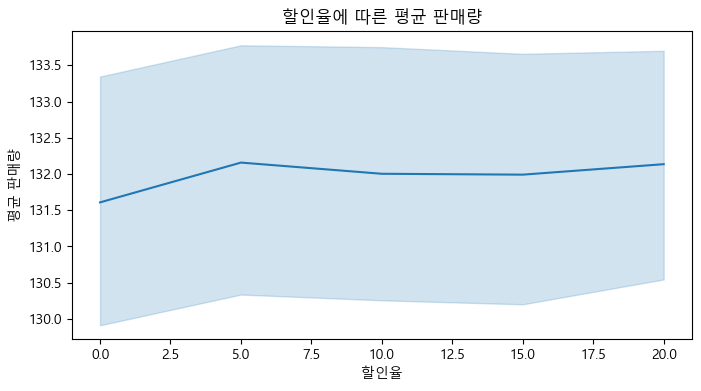

In [508]:
plt.figure(figsize=(8,4))
sns.lineplot(data = df, x='Discount', y='Units Sold')
plt.title('Ìï†Ïù∏Ïú®Ïóê Îî∞Î•∏ ÌèâÍ∑† ÌåêÎß§Îüâ')
plt.xlabel('Ìï†Ïù∏Ïú®')
plt.ylabel('ÌèâÍ∑† ÌåêÎß§Îüâ')
plt.show()

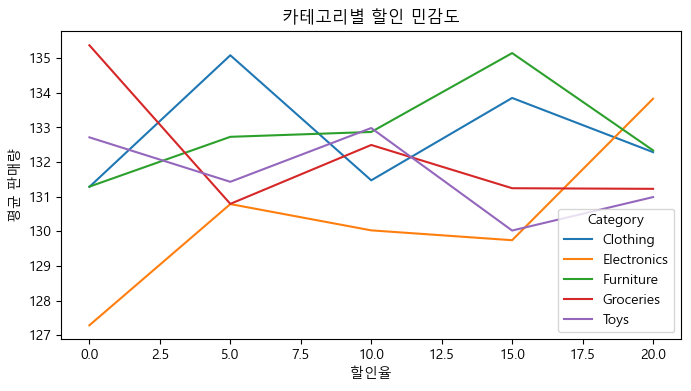

In [509]:
discount_sales = df.groupby(['Category', 'Discount'])['Units Sold'].mean().reset_index()
discount_sales

plt.figure(figsize=(8,4))
sns.lineplot(data = discount_sales, x='Discount', y='Units Sold', hue='Category')
plt.title('Ïπ¥ÌÖåÍ≥†Î¶¨Î≥Ñ Ìï†Ïù∏ ÎØºÍ∞êÎèÑ')
plt.xlabel('Ìï†Ïù∏Ïú®')
plt.ylabel('ÌèâÍ∑† ÌåêÎß§Îüâ')
plt.show()

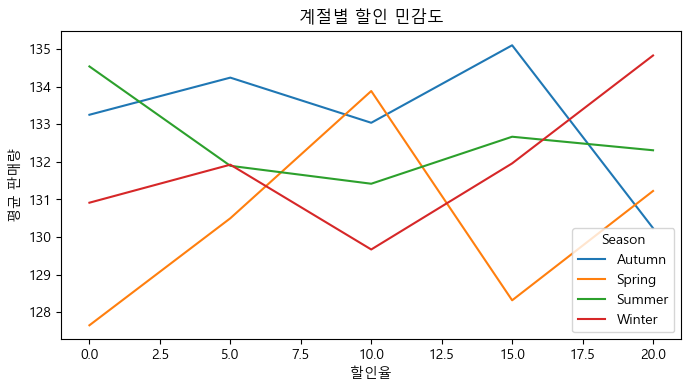

In [510]:
season_sales = df.groupby(['Season', 'Discount'])['Units Sold'].mean().reset_index()

plt.figure(figsize=(8,4))
sns.lineplot(data = season_sales, x='Discount', y='Units Sold', hue='Season')
plt.title('Í≥ÑÏ†àÎ≥Ñ Ìï†Ïù∏ ÎØºÍ∞êÎèÑ')
plt.xlabel('Ìï†Ïù∏Ïú®')
plt.ylabel('ÌèâÍ∑† ÌåêÎß§Îüâ')
plt.show()

#### 3) Í≤ΩÏüÅÏÇ¨ Í∞ÄÍ≤© Ìö®Í≥º
- Í≤ΩÏüÅÏÇ¨ ÎåÄÎπÑ ÏÉÅÎåÄÏ†Å Í∞ÄÍ≤©Ï∞®Ïù¥ Î≤îÏúÑÍ∞Ä 40% Ïù¥ÎÇ¥ÏóêÏÑúÎäî ÎπÑÍµêÏ†Å ÏïàÏ†ïÏ†ÅÏù∏ ÌåêÎß§ÎüâÏùÑ Î≥¥Ïù∏Îã§.
- ÌïòÏßÄÎßå, 40% Ïù¥ÏÉÅ Í∞ÄÍ≤©Ï∞®Ïù¥Í∞Ä ÎÇòÎäî Î≤îÏúÑÏóêÏÑúÎäî ÌåêÎß§Îüâ Î≥ÄÌôîÏùò Ìè≠Ïù¥ ÌÅ¨Îã§.
- ÎòêÌïú, ÏÉÅÎåÄÏ†ÅÏúºÎ°ú ÎπÑÏãº Í∏àÏï°ÏóêÏÑú Ïò§ÌûàÎ†§ ÌåêÎß§ÎüâÏù¥ Ï¶ùÍ∞ÄÌïòÎäî Í≤ΩÌñ•ÏùÑ Î≥¥Ïù¥Îäî ÌíàÎ™©ÎèÑ ÏûàÍ∏∞Ïóê Ï†úÌíà ÌäπÏÑ±Ïóê Îî∞Î•∏ Í∞ÄÍ≤© ÏµúÏ†ÅÌôîÍ∞Ä ÌïÑÏöîÌïòÎã§Í≥† ÌåêÎã®Îê®.


In [511]:
df.head(3)

Date Store ID Product ID   Category Region  Inventory Level  \
0 2022-01-01     S001      P0001  Groceries  North              231   
1 2022-01-01     S001      P0002       Toys  South              204   
2 2022-01-01     S001      P0003       Toys   West              102   

   Units Sold  Units Ordered  Demand Forecast  Price  ...  Holiday/Promotion  \
0         127             55           135.47  33.50  ...                  0   
1         150             66           144.04  63.01  ...                  0   
2          65             51            74.02  27.99  ...                  1   

  Competitor Pricing  Seasonality   Weekday  Year Month  Day  Season  \
0              29.69       Autumn  Saturday  2022     1    1  Winter   
1              66.16       Autumn  Saturday  2022     1    1  Winter   
2              31.32       Summer  Saturday  2022     1    1  Winter   

   Sale Price Product Classification  
0      26.800        Groceries_P0001  
1      50.408             Toys_P0002  
2      25.191             Toys_P0003  

[3 rows x 22 columns]

In [512]:
# ÏÉÅÎåÄ Í∞ÄÍ≤©Î≥ÄÏàò Ï∂îÍ∞Ä
temp_df = df.copy()
temp_df['relative_price'] = round((df['Sale Price'] - df['Competitor Pricing'])/df['Competitor Pricing'],2)
temp_df.head()

Date Store ID Product ID     Category Region  Inventory Level  \
0 2022-01-01     S001      P0001    Groceries  North              231   
1 2022-01-01     S001      P0002         Toys  South              204   
2 2022-01-01     S001      P0003         Toys   West              102   
3 2022-01-01     S001      P0004         Toys  North              469   
4 2022-01-01     S001      P0005  Electronics   East              166   

   Units Sold  Units Ordered  Demand Forecast  Price  ...  Competitor Pricing  \
0         127             55           135.47  33.50  ...               29.69   
1         150             66           144.04  63.01  ...               66.16   
2          65             51            74.02  27.99  ...               31.32   
3          61            164            62.18  32.72  ...               34.74   
4          14            135             9.26  73.64  ...               68.95   

  Seasonality   Weekday  Year Month Day  Season  Sale Price  \
0      Autumn  Saturday  2022     1   1  Winter      26.800   
1      Autumn  Saturday  2022     1   1  Winter      50.408   
2      Summer  Saturday  2022     1   1  Winter      25.191   
3      Autumn  Saturday  2022     1   1  Winter      29.448   
4      Summer  Saturday  2022     1   1  Winter      73.640   

   Product Classification relative_price  
0         Groceries_P0001          -0.10  
1              Toys_P0002          -0.24  
2              Toys_P0003          -0.20  
3              Toys_P0004          -0.15  
4       Electronics_P0005           0.07  

[5 rows x 23 columns]

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_26672\2504272466.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_sales = temp_df.groupby(['rel_price_bin', 'Category'])['Units Sold'].mean().reset_index()


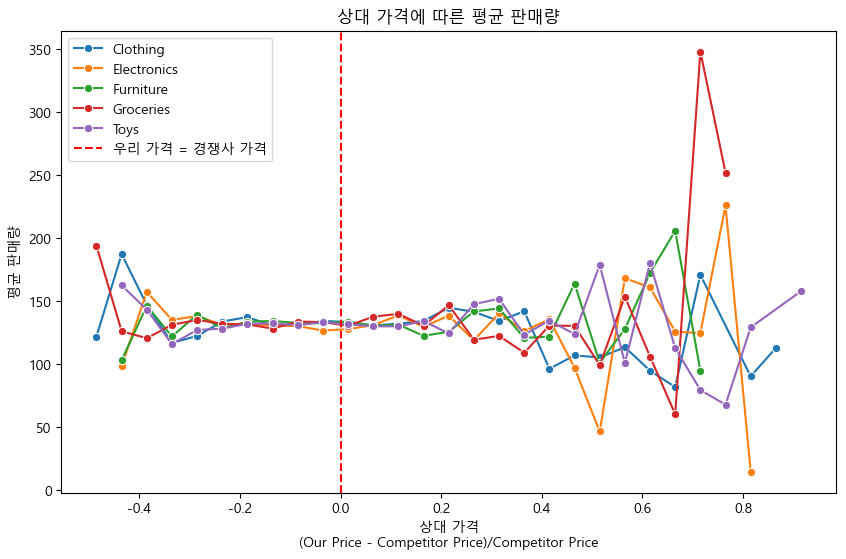

In [513]:
# relative_price ÎπÑÏú®ÏùÑ Í∏∞Î∞òÏúºÎ°ú Íµ¨Í∞Ñ ÎßåÎì§Í∏∞
bins = np.arange(temp_df['relative_price'].min() - 0.05, 
                 temp_df['relative_price'].max() + 0.05, 
                 0.05)  # 5% Îã®ÏúÑÎ°ú Íµ¨Í∞Ñ ÏÉùÏÑ±

temp_df['rel_price_bin'] = pd.cut(temp_df['relative_price'], bins=bins)

# Íµ¨Í∞ÑÎ≥Ñ ÌèâÍ∑† ÌåêÎß§Îüâ Í≥ÑÏÇ∞
avg_sales = temp_df.groupby(['rel_price_bin', 'Category'])['Units Sold'].mean().reset_index()

# Íµ¨Í∞Ñ Ï§ëÏïôÍ∞íÏúºÎ°ú Ïà´ÏûêÌôî
avg_sales['rel_price_mid'] = avg_sales['rel_price_bin'].apply(lambda x: x.mid)

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10,6))
sns.lineplot(data=avg_sales, x='rel_price_mid', y='Units Sold', marker='o', hue='Category')
plt.axvline(0, color='red', linestyle='--', label='Ïö∞Î¶¨ Í∞ÄÍ≤© = Í≤ΩÏüÅÏÇ¨ Í∞ÄÍ≤©')
plt.xlabel('ÏÉÅÎåÄ Í∞ÄÍ≤©\n(Our Price - Competitor Price)/Competitor Price')
plt.ylabel('ÌèâÍ∑† ÌåêÎß§Îüâ')
plt.title('ÏÉÅÎåÄ Í∞ÄÍ≤©Ïóê Îî∞Î•∏ ÌèâÍ∑† ÌåêÎß§Îüâ')
plt.legend()
plt.show()

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_26672\256965226.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  electronics_df['rel_price_bin'] = pd.cut(electronics_df['relative_price'], bins=bins)
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_26672\256965226.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_sales = electronics_df.groupby(['rel_price_bin', 'Product ID'])['Units Sold'].mean().reset_index()


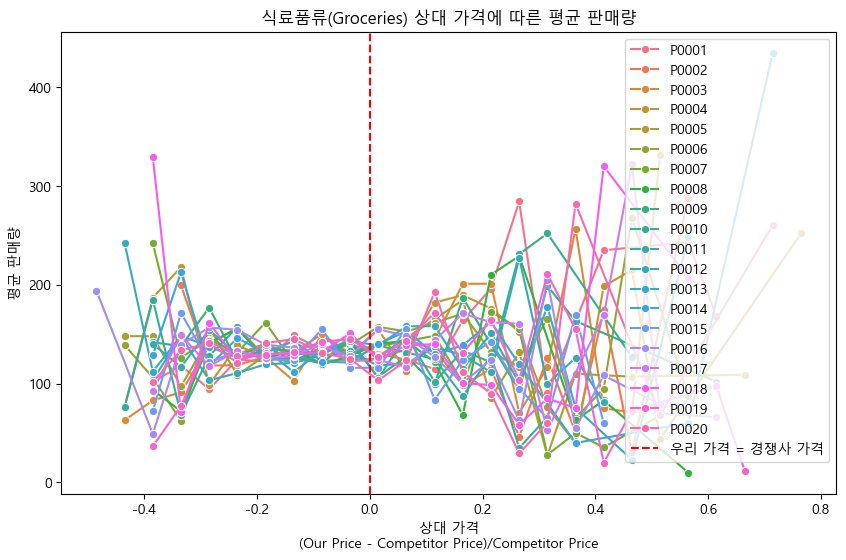

In [514]:
electronics_df = temp_df[temp_df['Category'] == 'Groceries']

# relative_price ÎπÑÏú®ÏùÑ Í∏∞Î∞òÏúºÎ°ú Íµ¨Í∞Ñ ÎßåÎì§Í∏∞
bins = np.arange(electronics_df['relative_price'].min() - 0.05, 
                 electronics_df['relative_price'].max() + 0.05, 
                 0.05)  # 5% Îã®ÏúÑÎ°ú Íµ¨Í∞Ñ ÏÉùÏÑ±

electronics_df['rel_price_bin'] = pd.cut(electronics_df['relative_price'], bins=bins)

# Íµ¨Í∞ÑÎ≥Ñ ÌèâÍ∑† ÌåêÎß§Îüâ Í≥ÑÏÇ∞
avg_sales = electronics_df.groupby(['rel_price_bin', 'Product ID'])['Units Sold'].mean().reset_index()

# Íµ¨Í∞Ñ Ï§ëÏïôÍ∞íÏúºÎ°ú Ïà´ÏûêÌôî
avg_sales['rel_price_mid'] = avg_sales['rel_price_bin'].apply(lambda x: x.mid)

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10,6))
sns.lineplot(data=avg_sales, x='rel_price_mid', y='Units Sold', marker='o', hue='Product ID')
plt.axvline(0, color='red', linestyle='--', label='Ïö∞Î¶¨ Í∞ÄÍ≤© = Í≤ΩÏüÅÏÇ¨ Í∞ÄÍ≤©')
plt.xlabel('ÏÉÅÎåÄ Í∞ÄÍ≤©\n(Our Price - Competitor Price)/Competitor Price')
plt.ylabel('ÌèâÍ∑† ÌåêÎß§Îüâ')
plt.title('ÏãùÎ£åÌíàÎ•ò(Groceries) ÏÉÅÎåÄ Í∞ÄÍ≤©Ïóê Îî∞Î•∏ ÌèâÍ∑† ÌåêÎß§Îüâ')
plt.legend()
plt.show()


#### 4) ÏãúÏ¶åÏÑ± Î∞è Í∏∞ÌÉÄ Îã§Î•∏ ÏöîÏù∏Í≥ºÏùò Í¥ÄÍ≥ÑÏÑ±
- Í≥ÑÏ†àÏù¥ÎÇò Ìú¥Ïùº, ÌîÑÎ°úÎ™®ÏÖòÏùò ÏòÅÌñ•Ïù¥ ÌåêÎß§ÎüâÍ≥ºÏùò Í¥ÄÍ≥ÑÍ∞Ä ÌÅ¨ÏßÄ ÏïäÏùÄ Í≤ÉÏúºÎ°ú ÌôïÏù∏Îê®.

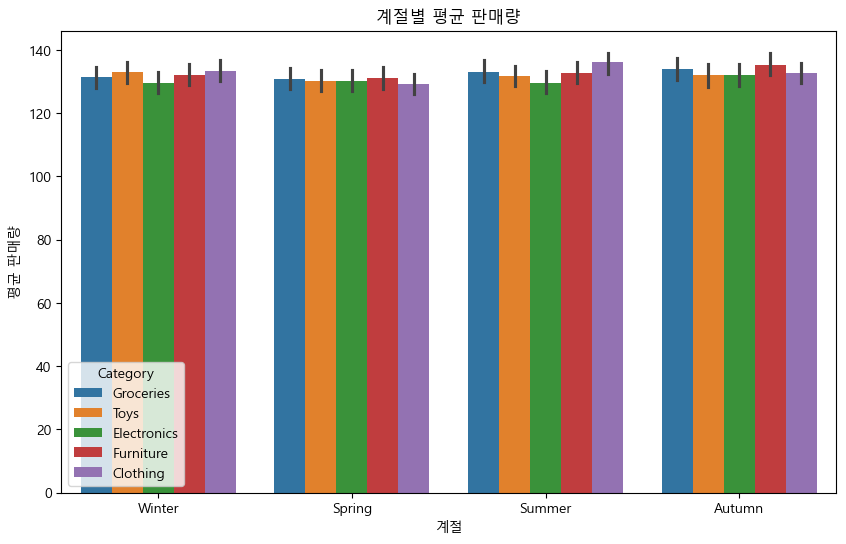

In [515]:
plt.figure(figsize=(10,6))
sns.barplot(data=df, x='Season', y='Units Sold', estimator='mean', hue='Category')
plt.title('Í≥ÑÏ†àÎ≥Ñ ÌèâÍ∑† ÌåêÎß§Îüâ')
plt.xlabel('Í≥ÑÏ†à')
plt.ylabel('ÌèâÍ∑† ÌåêÎß§Îüâ')
plt.show()

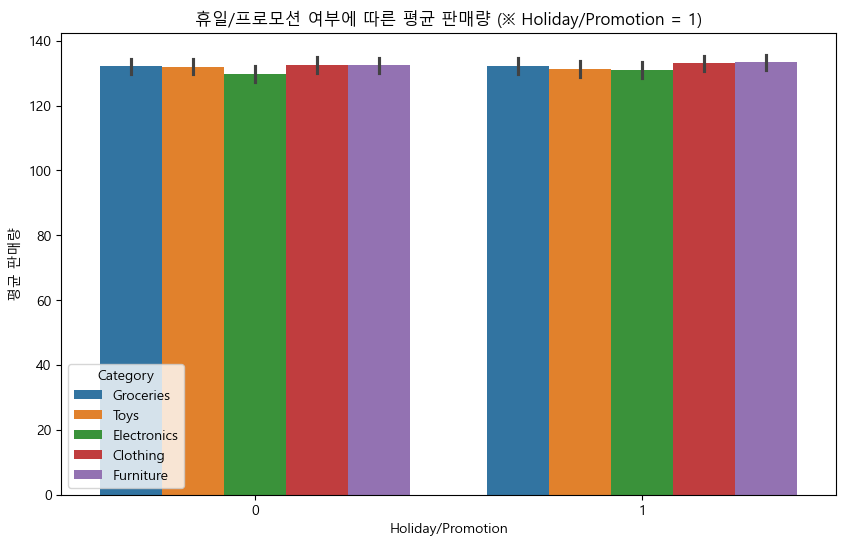

In [516]:
plt.figure(figsize=(10,6))
sns.barplot(data=df, x='Holiday/Promotion', y='Units Sold', estimator='mean', hue='Category')
plt.title('Ìú¥Ïùº/ÌîÑÎ°úÎ™®ÏÖò Ïó¨Î∂ÄÏóê Îî∞Î•∏ ÌèâÍ∑† ÌåêÎß§Îüâ (‚Äª Holiday/Promotion = 1)')
plt.ylabel('ÌèâÍ∑† ÌåêÎß§Îüâ')
plt.show()

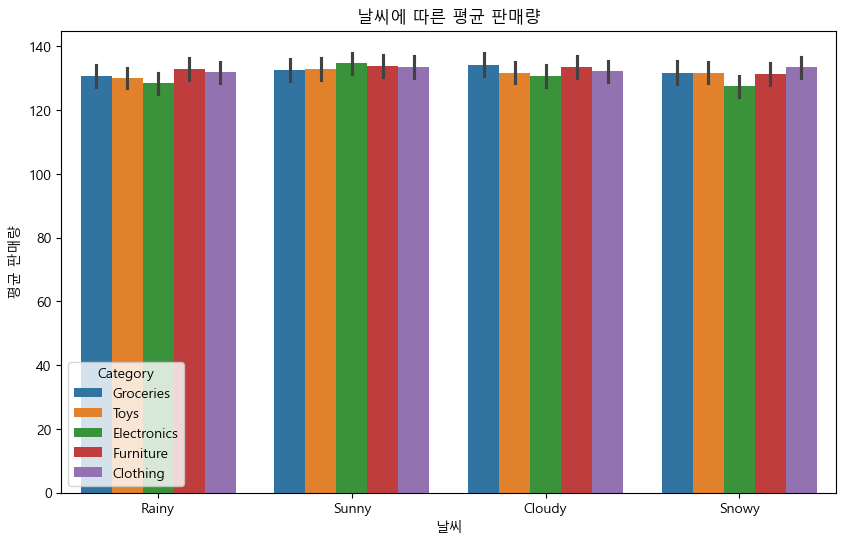

In [517]:
plt.figure(figsize=(10,6))
sns.barplot(data=df, x='Weather Condition', y='Units Sold', estimator='mean', hue='Category')
plt.title('ÎÇ†Ïî®Ïóê Îî∞Î•∏ ÌèâÍ∑† ÌåêÎß§Îüâ')
plt.xlabel('ÎÇ†Ïî®')
plt.ylabel('ÌèâÍ∑† ÌåêÎß§Îüâ')
plt.show()

In [283]:
# import pandas as pd
# import numpy as np

# def sample_like_normal(df, column='Units Sold', total_target=72000, random_state=42):
#     mean = df[column].mean()
#     std = df[column].std()

#     # Z-score Íµ¨Í∞Ñ Ï†ïÏùòÏôÄ ÎπÑÏú®
#     z_bins = [-3, -2, -1, 0, 1, 2, 3]
#     proportions = [0.021, 0.136, 0.341, 0.341, 0.136, 0.021]  # Ï†ïÍ∑úÎ∂ÑÌè¨ ÎπÑÏú®
#     total_proportion = sum(proportions)  # Ìï©Í≥ÑÎäî 0.996

#     # Ï†ïÍ∑úÌôî Î≥¥Ï†ï (Ìï©Ïù¥ 1Ïù¥ ÏïÑÎãàÎØÄÎ°ú)
#     proportions = [p / total_proportion for p in proportions]

#     sampled_data = []

#     for i in range(len(z_bins) - 1):
#         lower_z = z_bins[i]
#         upper_z = z_bins[i + 1]

#         lower_bound = mean + lower_z * std
#         upper_bound = mean + upper_z * std

#         bin_df = df[(df[column] >= lower_bound) & (df[column] < upper_bound)]

#         target_n = int(total_target * proportions[i])
#         actual_n = min(len(bin_df), target_n)

#         if actual_n > 0:
#             sampled = bin_df.sample(n=actual_n, random_state=random_state)
#             sampled_data.append(sampled)

#         print(f"{lower_z}œÉ ~ {upper_z}œÉ: Î™©Ìëú {target_n}Í∞ú, Ïã§Ï†ú {actual_n}Í∞ú")

#     final_df = pd.concat(sampled_data).reset_index(drop=True)

#     print(f"\nÏ¥ù ÏÉòÌîå Ïàò: {len(final_df)} (Î™©Ìëú: {total_target})")
#     return final_df


In [284]:
# balanced_df = sample_like_normal(df, column='Units Sold', total_target=len(temp_df))
# balanced_df

### ÌîºÏ≤ò ÏóîÏßÄÎãàÏñ¥ÎßÅ

In [518]:
final_df = df.copy()
# ÏÉÅÎåÄ Í∞ÄÍ≤© Î≥ÄÏàò
final_df['relative_price'] = round((final_df['Sale Price'] - final_df['Competitor Pricing'])/final_df['Competitor Pricing'],2)
final_df.head()

Date Store ID Product ID     Category Region  Inventory Level  \
0 2022-01-01     S001      P0001    Groceries  North              231   
1 2022-01-01     S001      P0002         Toys  South              204   
2 2022-01-01     S001      P0003         Toys   West              102   
3 2022-01-01     S001      P0004         Toys  North              469   
4 2022-01-01     S001      P0005  Electronics   East              166   

   Units Sold  Units Ordered  Demand Forecast  Price  ...  Competitor Pricing  \
0         127             55           135.47  33.50  ...               29.69   
1         150             66           144.04  63.01  ...               66.16   
2          65             51            74.02  27.99  ...               31.32   
3          61            164            62.18  32.72  ...               34.74   
4          14            135             9.26  73.64  ...               68.95   

  Seasonality   Weekday  Year Month Day  Season  Sale Price  \
0      Autumn  Saturday  2022     1   1  Winter      26.800   
1      Autumn  Saturday  2022     1   1  Winter      50.408   
2      Summer  Saturday  2022     1   1  Winter      25.191   
3      Autumn  Saturday  2022     1   1  Winter      29.448   
4      Summer  Saturday  2022     1   1  Winter      73.640   

   Product Classification relative_price  
0         Groceries_P0001          -0.10  
1              Toys_P0002          -0.24  
2              Toys_P0003          -0.20  
3              Toys_P0004          -0.15  
4       Electronics_P0005           0.07  

[5 rows x 23 columns]

#### ÏãúÍ≥ÑÏó¥ ÏòàÏ∏°Ïùò Ï†ïÌôïÎèÑ Ìñ•ÏÉÅÏùÑ ÏúÑÌï¥ ÏãúÍ≥ÑÏó¥ ÌäπÏÑ± Ï∂îÍ∞Ä
- ÌåêÎß§ÎüâÏùò Ï£ºÍ∏∞ÏÑ±Ïù¥ Î≥¥Ïù¥ÏßÄ ÏïäÏúºÎÇò ÏöîÏùºÎ≥Ñ ÌäπÏÑ±ÏùÑ Î∞òÏòÅÌïòÍ∏∞ ÏúÑÌï¥ 7ÏùºÏ†Ñ ÌåêÎß§ÎüâÏùÑ ÌäπÏÑ±ÏúºÎ°ú Ï∂îÍ∞Ä
- ÏõîÎ≥ÑÎ°ú ÌåêÎß§Îüâ Î≥ÄÎèôÏù¥ ÏûàÎäî Í≤ÉÏúºÎ°ú ÌôïÏù∏ÎêòÎØÄÎ°ú ÏµúÍ∑º 30Ïùº ÌåêÎß§Îüâ ÌèâÍ∑†ÏùÑ ÌäπÏÑ±ÏúºÎ°ú Ï∂îÍ∞ÄÌï®
- Ïπ¥ÌÖåÍ≥†Î¶¨Î≥ÑÎ°ú ÏÉÅÏ†êÍ≥º Ï†úÌíà ÏïÑÏù¥ÎîîÍ∞Ä ÎèôÏùºÌïòÎØÄÎ°ú ÏÉÅÌíà Î∂ÑÎ•òÎ•º ÏúÑÌï¥ 3Í∞úÏùò ÌäπÏÑ±ÏúºÎ°ú Í∑∏Î£πÌôîÌï®.

In [519]:
# 1ÏùºÏ†Ñ ÌåêÎß§Îüâ(ÏãúÍ≥ÑÏó¥ÏóêÏÑú Í∞ÄÏû• Í∞ïÎ†•ÌïòÍ≤å ÏÇ¨Ïö©ÌïòÎäî ÌäπÏÑ±)
final_df['lag_1'] = final_df.groupby(['Store ID', 'Product ID', 'Category'])['Units Sold'].shift(1)

# 7ÏùºÏ†Ñ ÌåêÎß§Îüâ
final_df['lag_7'] = final_df.groupby(['Store ID', 'Product ID', 'Category'])['Units Sold'].shift(7)

# 30Ïùº rolling ÌèâÍ∑† (Ïñ¥Ï†úÍπåÏßÄ 30ÏùºÍ∞Ñ ÌèâÍ∑†)
final_df['rolling_30'] = final_df.groupby(['Store ID', 'Product ID', 'Category'])['Units Sold'].shift(1).rolling(window=30).mean()
final_df

Date Store ID Product ID     Category Region  Inventory Level  \
0     2022-01-01     S001      P0001    Groceries  North              231   
1     2022-01-01     S001      P0002         Toys  South              204   
2     2022-01-01     S001      P0003         Toys   West              102   
3     2022-01-01     S001      P0004         Toys  North              469   
4     2022-01-01     S001      P0005  Electronics   East              166   
...          ...      ...        ...          ...    ...              ...   
71970 2024-01-01     S005      P0016    Furniture   East               96   
71971 2024-01-01     S005      P0017         Toys  North              313   
71972 2024-01-01     S005      P0018     Clothing   West              278   
71973 2024-01-01     S005      P0019         Toys   East              374   
71974 2024-01-01     S005      P0020    Groceries   East              117   

       Units Sold  Units Ordered  Demand Forecast  Price  ...  Year Month  \
0             127             55           135.47  33.50  ...  2022     1   
1             150             66           144.04  63.01  ...  2022     1   
2              65             51            74.02  27.99  ...  2022     1   
3              61            164            62.18  32.72  ...  2022     1   
4              14            135             9.26  73.64  ...  2022     1   
...           ...            ...              ...    ...  ...   ...   ...   
71970           8            127            18.46  73.73  ...  2024     1   
71971          51            101            48.43  82.57  ...  2024     1   
71972          36            151            39.65  11.11  ...  2024     1   
71973         264             21           270.52  53.14  ...  2024     1   
71974           6            165             2.33  78.39  ...  2024     1   

       Day  Season Sale Price Product Classification  relative_price  lag_1  \
0        1  Winter     26.800        Groceries_P0001           -0.10    NaN   
1        1  Winter     50.408             Toys_P0002           -0.24    NaN   
2        1  Winter     25.191             Toys_P0003           -0.20    NaN   
3        1  Winter     29.448             Toys_P0004           -0.15    NaN   
4        1  Winter     73.640      Electronics_P0005            0.07    NaN   
...    ...     ...        ...                    ...             ...    ...   
71970    1  Winter     58.984        Furniture_P0016           -0.19   13.0   
71971    1  Winter     74.313             Toys_P0017           -0.11  104.0   
71972    1  Winter      9.999         Clothing_P0018           -0.08  111.0   
71973    1  Winter     42.512             Toys_P0019           -0.24   17.0   
71974    1  Winter     62.712        Groceries_P0020           -0.21   56.0   

       lag_7  rolling_30  
0        NaN         NaN  
1        NaN         NaN  
2        NaN         NaN  
3        NaN         NaN  
4        NaN         NaN  
...      ...         ...  
71970   63.0  131.300000  
71971    3.0  123.000000  
71972  265.0  124.866667  
71973   27.0  118.733333  
71974   30.0  115.766667  

[71975 rows x 26 columns]

In [520]:
# NaNÍ∞í Ï†úÍ±∞
final_df = final_df.dropna().reset_index(drop=True)
final_df.head()

Date Store ID Product ID   Category Region  Inventory Level  \
0 2022-01-17     S001      P0013       Toys  North              167   
1 2022-01-17     S002      P0004  Groceries   West              411   
2 2022-01-17     S002      P0011   Clothing  South              387   
3 2022-01-17     S005      P0012  Groceries  North              101   
4 2022-01-18     S001      P0003       Toys   East              203   

   Units Sold  Units Ordered  Demand Forecast  Price  ...  Year Month  Day  \
0          99            146           103.04  66.65  ...  2022     1   17   
1         368             66           371.89  17.02  ...  2022     1   17   
2          25             56            18.41  70.44  ...  2022     1   17   
3          36            144            30.78  82.36  ...  2022     1   17   
4          70            147            78.83  82.71  ...  2022     1   18   

   Season Sale Price Product Classification  relative_price  lag_1  lag_7  \
0  Winter    53.3200             Toys_P0013           -0.20   80.0   42.0   
1  Winter    13.6160        Groceries_P0004           -0.32  105.0   88.0   
2  Winter    66.9180         Clothing_P0011           -0.01  329.0  143.0   
3  Winter    82.3600        Groceries_P0012           -0.03   49.0  171.0   
4  Winter    70.3035             Toys_P0003           -0.19   61.0   65.0   

   rolling_30  
0  141.033333  
1  132.033333  
2  136.566667  
3  121.633333  
4  149.400000  

[5 rows x 26 columns]

- Yeo-Johnson Î≥ÄÌôò

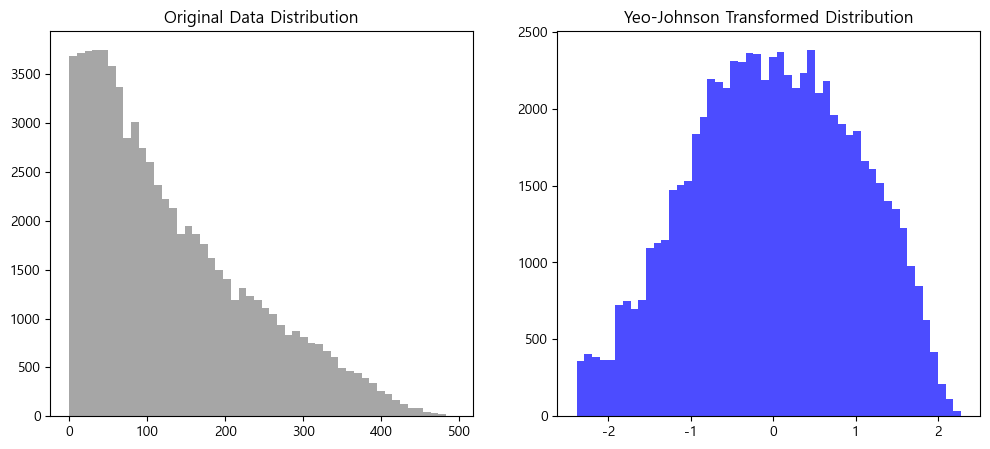

In [521]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='yeo-johnson')
transformed = pt.fit_transform(df[['Units Sold']])
data = df['Units Sold'].copy()

# # Ïòà: df['Units Sold']Í∞Ä 0 Ïù¥ÏÉÅÏùò Í∞íÎßå ÏûàÎã§Í≥† Í∞ÄÏ†ï

# # 1. Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ
# data = df['Units Sold'].copy()

# # 2. 0 Ïù¥Ìïò Í∞íÏù¥ ÏûàÏúºÎ©¥ ÏûëÏùÄ ÏñëÏàò ÎçîÌïòÍ∏∞ (optional)
# if (data <= 0).any():
#     data = data + abs(data.min()) + 1

# # 3. Box-Cox Î≥ÄÌôò ÏàòÌñâ
# data_boxcox, fitted_lambda = stats.boxcox(data)

# print(f"Optimal lambda for Box-Cox: {fitted_lambda:.4f}")

# 4. Î≥ÄÌôò Ï†ÑÌõÑ ÌûàÏä§ÌÜ†Í∑∏Îû® ÎπÑÍµê
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.hist(data, bins=50, color='gray', alpha=0.7)
plt.title('Original Data Distribution')

plt.subplot(1,2,2)
plt.hist(transformed, bins=50, color='blue', alpha=0.7)
plt.title('Yeo-Johnson Transformed Distribution')

plt.show()

In [522]:
df['Units Sold_YJ'] = transformed.flatten() # 1Ï∞®Ïõê Î∞∞Ïó¥Î°ú ÎßåÎì§Í∏∞
final_df['Units Sold_YJ'] = pd.Series(transformed.flatten(), index=df.index)

In [523]:
final_df.head(2)

Date Store ID Product ID   Category Region  Inventory Level  \
0 2022-01-17     S001      P0013       Toys  North              167   
1 2022-01-17     S002      P0004  Groceries   West              411   

   Units Sold  Units Ordered  Demand Forecast  Price  ...  Month Day  Season  \
0          99            146           103.04  66.65  ...      1  17  Winter   
1         368             66           371.89  17.02  ...      1  17  Winter   

   Sale Price Product Classification relative_price  lag_1  lag_7  rolling_30  \
0      53.320             Toys_P0013          -0.20   80.0   42.0  141.033333   
1      13.616        Groceries_P0004          -0.32  105.0   88.0  132.033333   

  Units Sold_YJ  
0      0.216682  
1      0.416323  

[2 rows x 27 columns]

In [ ]:
# final_df['Log Units Sold'] = np.log1p(final_df['Units Sold'])

In [524]:
final_df.columns

Index(['Date', 'Store ID', 'Product ID', 'Category', 'Region',
       'Inventory Level', 'Units Sold', 'Units Ordered', 'Demand Forecast',
       'Price', 'Discount', 'Weather Condition', 'Holiday/Promotion',
       'Competitor Pricing', 'Seasonality', 'Weekday', 'Year', 'Month', 'Day',
       'Season', 'Sale Price', 'Product Classification', 'relative_price',
       'lag_1', 'lag_7', 'rolling_30', 'Units Sold_YJ'],
      dtype='object')

In [525]:
filtered_df= final_df[['Date', 'Year', 'Month', 'Day', 'Product Classification', 'Category', 'Region',
                       'Price', 'Discount', 'Weather Condition', 'Holiday/Promotion',
                       'Competitor Pricing', 'Weekday', 'Season', 'Sale Price',
                       'relative_price', 'lag_1', 'lag_7', 'rolling_30', 'Units Sold_YJ']]

In [526]:
filtered_df.to_csv('./archive/retail_store_inventory_modify.csv') # Î™®Îç∏ ÌïôÏäµ Ï†Ñ Îç∞Ïù¥ÌÑ∞ Ï†ÄÏû•

In [527]:
filtered_df = pd.read_csv('./archive/retail_store_inventory_modify.csv', index_col=0)
filtered_df.head()

Date  Year  Month  Day Product Classification   Category Region  \
0  2022-01-17  2022      1   17             Toys_P0013       Toys  North   
1  2022-01-17  2022      1   17        Groceries_P0004  Groceries   West   
2  2022-01-17  2022      1   17         Clothing_P0011   Clothing  South   
3  2022-01-17  2022      1   17        Groceries_P0012  Groceries  North   
4  2022-01-18  2022      1   18             Toys_P0003       Toys   East   

   Price  Discount Weather Condition  Holiday/Promotion  Competitor Pricing  \
0  66.65        20             Sunny                  1               66.90   
1  17.02        20             Snowy                  0               20.09   
2  70.44         5             Rainy                  0               67.66   
3  82.36         0             Snowy                  1               85.31   
4  82.71        15             Sunny                  0               86.78   

   Weekday  Season  Sale Price  relative_price  lag_1  lag_7  rolling_30  \
0   Monday  Winter     53.3200           -0.20   80.0   42.0  141.033333   
1   Monday  Winter     13.6160           -0.32  105.0   88.0  132.033333   
2   Monday  Winter     66.9180           -0.01  329.0  143.0  136.566667   
3   Monday  Winter     82.3600           -0.03   49.0  171.0  121.633333   
4  Tuesday  Winter     70.3035           -0.19   61.0   65.0  149.400000   

   Units Sold_YJ  
0       0.216682  
1       0.416323  
2      -0.469258  
3      -0.525560  
4      -1.502766

In [528]:
last_df = filtered_df.drop(columns='Date')
last_df.head()

Year  Month  Day Product Classification   Category Region  Price  Discount  \
0  2022      1   17             Toys_P0013       Toys  North  66.65        20   
1  2022      1   17        Groceries_P0004  Groceries   West  17.02        20   
2  2022      1   17         Clothing_P0011   Clothing  South  70.44         5   
3  2022      1   17        Groceries_P0012  Groceries  North  82.36         0   
4  2022      1   18             Toys_P0003       Toys   East  82.71        15   

  Weather Condition  Holiday/Promotion  Competitor Pricing  Weekday  Season  \
0             Sunny                  1               66.90   Monday  Winter   
1             Snowy                  0               20.09   Monday  Winter   
2             Rainy                  0               67.66   Monday  Winter   
3             Snowy                  1               85.31   Monday  Winter   
4             Sunny                  0               86.78  Tuesday  Winter   

   Sale Price  relative_price  lag_1  lag_7  rolling_30  Units Sold_YJ  
0     53.3200           -0.20   80.0   42.0  141.033333       0.216682  
1     13.6160           -0.32  105.0   88.0  132.033333       0.416323  
2     66.9180           -0.01  329.0  143.0  136.566667      -0.469258  
3     82.3600           -0.03   49.0  171.0  121.633333      -0.525560  
4     70.3035           -0.19   61.0   65.0  149.400000      -1.502766

#### Ïù∏ÏΩîÎî©

In [623]:
from sklearn.preprocessing import LabelEncoder

label_df = last_df.copy()
object_cols = label_df.select_dtypes(include='object').columns

# Í∞Å Ïó¥Ïóê ÎåÄÌï¥ ÎùºÎ≤® Ïù∏ÏΩîÎî© Ï†ÅÏö©
encoders = {}  # Ïª¨ÎüºÎ≥Ñ LabelEncoder Ï†ÄÏû• ÎîïÏÖîÎÑàÎ¶¨
for col in object_cols:
    le = LabelEncoder()
    label_df[col] = le.fit_transform(label_df[col])
    encoders[col] = le

label_df

Year  Month  Day  Product Classification  Category  Region  Price  \
0      2022      1   17                      92         4       1  66.65   
1      2022      1   17                      63         3       3  17.02   
2      2022      1   17                      10         0       2  70.44   
3      2022      1   17                      71         3       1  82.36   
4      2022      1   18                      82         4       0  82.71   
...     ...    ...  ...                     ...       ...     ...    ...   
68420  2024      1    1                      55         2       0  73.73   
68421  2024      1    1                      96         4       1  82.57   
68422  2024      1    1                      17         0       3  11.11   
68423  2024      1    1                      98         4       0  53.14   
68424  2024      1    1                      79         3       0  78.39   

       Discount  Weather Condition  Holiday/Promotion  Competitor Pricing  \
0            20                  3                  1               66.90   
1            20                  2                  0               20.09   
2             5                  1                  0               67.66   
3             0                  2                  1               85.31   
4            15                  3                  0               86.78   
...         ...                ...                ...                 ...   
68420        20                  2                  0               72.45   
68421        10                  0                  0               83.78   
68422        10                  1                  0               10.91   
68423        20                  1                  0               55.80   
68424        20                  1                  1               79.52   

       Weekday  Season  Sale Price  relative_price  lag_1  lag_7  rolling_30  \
0            1       3     53.3200           -0.20   80.0   42.0  141.033333   
1            1       3     13.6160           -0.32  105.0   88.0  132.033333   
2            1       3     66.9180           -0.01  329.0  143.0  136.566667   
3            1       3     82.3600           -0.03   49.0  171.0  121.633333   
4            5       3     70.3035           -0.19   61.0   65.0  149.400000   
...        ...     ...         ...             ...    ...    ...         ...   
68420        1       3     58.9840           -0.19   13.0   63.0  131.300000   
68421        1       3     74.3130           -0.11  104.0    3.0  123.000000   
68422        1       3      9.9990           -0.08  111.0  265.0  124.866667   
68423        1       3     42.5120           -0.24   17.0   27.0  118.733333   
68424        1       3     62.7120           -0.21   56.0   30.0  115.766667   

       Units Sold_YJ  
0           0.216682  
1           0.416323  
2          -0.469258  
3          -0.525560  
4          -1.502766  
...              ...  
68420       0.160983  
68421      -1.090474  
68422       1.933514  
68423      -1.744408  
68424       1.920197  

[68425 rows x 19 columns]

In [624]:
encoders

{'Product Classification': LabelEncoder(),
 'Category': LabelEncoder(),
 'Region': LabelEncoder(),
 'Weather Condition': LabelEncoder(),
 'Weekday': LabelEncoder(),
 'Season': LabelEncoder()}

In [123]:
# from sklearn.preprocessing import OneHotEncoder

# ohe = OneHotEncoder(sparse_output=False)

# object_cols = filtered_df.select_dtypes(include='object').columns.to_list()
# ohe_array = ohe.fit_transform(filtered_df[object_cols])
# ohe_df = pd.DataFrame(ohe_array, columns=ohe.get_feature_names_out(object_cols))
# ohe_df

In [124]:
# ohe_df.columns.to_list()[0].split('_', 1)[1]

In [125]:
# new_cols = []
# for c in ohe_df.columns.to_list():
#     new_cols.append(c.split('_', 1)[1])

# ohe_df.columns = new_cols
# ohe_df

In [126]:
# from sklearn.preprocessing import StandardScaler

# numeric_cols = ['Price', 'Discount', 'Competitor Pricing',
#                 'Sale Price', 'relative_price', 'lag_1', 'lag_7', 'rolling_30']

# scaler = StandardScaler()
# scaled_array = scaler.fit_transform(filtered_df[numeric_cols])
# scaled_df = pd.DataFrame(scaled_array, columns=numeric_cols, index=filtered_df.index)
# scaled_df


In [127]:
# encoded_df = pd.concat([scaled_df, ohe_df], axis=1)
# encoded_df = pd.concat([encoded_df, filtered_df['Units Sold']], axis=1)
# encoded_df

In [128]:
# encoded_df.columns

#### ÏÉÅÍ¥Ä Í¥ÄÍ≥Ñ ÌôïÏù∏
- ÌåêÎß§ÎüâÍ≥º Í∞Å Î≥ÄÏàòÍ∞ÑÏùò ÏÑ†ÌòïÏÑ±ÏùÄ Î≥¥Ïù¥ÏßÄ ÏïäÎäîÎã§

In [151]:
# corr_matrix = encoded_df.corr()

In [152]:
# views_corr = corr_matrix['Units Sold'].abs().sort_values(ascending=False)
# top20_columns = views_corr.index[:20]
# len(top20_columns), top20_columns

In [153]:
# top20_corr = corr_matrix.loc[top20_columns, top20_columns]
# top20_corr['Units Sold']

In [154]:
# plt.figure(figsize=(10,8))
# sns.heatmap(top20_corr, annot=True, fmt=".2f", cmap='coolwarm')
# plt.title('ÌäπÏÑ± ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ')
# plt.show()

### Î™®Îç∏ ÌïôÏäµ
- ÌäπÏÑ±Í≥º ÌÉÄÍ≤üÍ≥ºÏùò ÏÑ†ÌòïÏÑ±Ïù¥ Î≥¥Ïù¥ÏßÄ ÏïäÏúºÎØÄÎ°ú ÎπÑÏÑ†Ìòï Ìö®Í≥ºÎ•º Î∞òÏòÅÌïòÎäî XGBoost/LightGBM ÏÇ¨Ïö©
- LightGBM: ÏÜçÎèÑÏôÄ Î©îÎ™®Î¶¨ Ìö®Ïú® Ïû•Ï†ê
- XGBoost: Ï†ïÌôïÎèÑ Ïû•Ï†ê

In [625]:
label_df['quantity_bin'], bin_edges = pd.qcut(label_df['Units Sold_YJ'], q=10, retbins=True, labels=False, duplicates='drop')

# Í∞Å Íµ¨Í∞ÑÎ≥Ñ ÎπÑÏú® ÌôïÏù∏
bin_counts = label_df['quantity_bin'].value_counts(normalize=True).sort_index()
print("Íµ¨Í∞ÑÎ≥Ñ ÎπÑÏú®:\n", bin_counts)

Íµ¨Í∞ÑÎ≥Ñ ÎπÑÏú®:
 quantity_bin
0    0.102959
1    0.098663
2    0.102565
3    0.099744
4    0.097333
5    0.101469
6    0.098590
7    0.099174
8    0.100402
9    0.099101
Name: proportion, dtype: float64


In [626]:
# Í∞Å Íµ¨Í∞ÑÏùò ÎπÑÏú®Ïóê Î∞òÎπÑÎ°ÄÌïòÎäî weight Í≥ÑÏÇ∞ (Ìù¨Í∑ÄÌï†ÏàòÎ°ù ÎÜíÏùÄ Í∞ÄÏ§ëÏπò)
weight_map = 1 / bin_counts
label_df['sample_weight'] = label_df['quantity_bin'].map(weight_map)
label_df['sample_weight']

0         9.855250
1        10.143048
2        10.025641
3        10.025641
4         9.712562
           ...    
68420     9.855250
68421    10.135535
68422    10.090695
68423     9.712562
68424    10.090695
Name: sample_weight, Length: 68425, dtype: float64

In [627]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X = label_df.drop(columns=['Units Sold_YJ', 'sample_weight', 'quantity_bin'])  # ÏÑ§Î™Ö Î≥ÄÏàò
y = label_df['Units Sold_YJ']                 # ÌÉÄÍ≤ü Î≥ÄÏàò
weights = label_df['sample_weight']


# 1Ï∞®: train / temp (train 70%, temp 30%)
X_train, X_temp, y_train, y_temp, w_train, w_valid = train_test_split(
    X, y, weights, test_size=0.3, random_state=13
)

# 2Ï∞®: temp ‚Üí valid / test (valid 15%, test 15%)
X_valid, X_test, y_valid, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=15
)

# LightGBM Îç∞Ïù¥ÌÑ∞ÏÖã ÏÉùÏÑ±
train_data = lgb.Dataset(X_train, label=y_train, weight=w_train)
valid_data = lgb.Dataset(X_valid, label=y_valid)
test_data = lgb.Dataset(X_test, label=y_test)

# ÌååÎùºÎØ∏ÌÑ∞ ÏÑ§Ï†ï
params = {
    'objective': 'regression',
    'metric': 'rmse',
    'boosting_type': 'gbdt',
    'learning_rate': 0.05,
    'num_leaves': 30,
    'feature_fraction': 0.8, # ÌïôÏäµÏãú Î¨¥ÏûëÏúÑÎ°ú ÏùºÎ∂Ä ÌîºÏ≤òÎßå ÏÇ¨Ïö©
    'bagging_fraction': 0.8, # ÏùºÎ∂Ä Îç∞Ïù¥ÌÑ∞ ÏÉòÌîåÎßÅ
    'bagging_freq': 5, # bagging_fraction Ï†ÅÏö© Ï£ºÍ∏∞
    'verbose': -1
}

# Î™®Îç∏ ÌïôÏäµ
model = lgb.train(
    params,
    train_data,
    valid_sets=[train_data, valid_data],
    num_boost_round=1000,
    callbacks=[
        lgb.early_stopping(50),        # early stopping
        lgb.log_evaluation(100)        # 100Î≤àÎßàÎã§ Î°úÍ∑∏ Ï∂úÎ†•
    ]
)

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[43]	training's rmse: 0.988776	valid_1's rmse: 0.998211


In [628]:
y_pred = model.predict(X_test)

In [629]:
# ÌèâÍ∞Ä
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE: {rmse:.2f}')

RMSE: 1.00


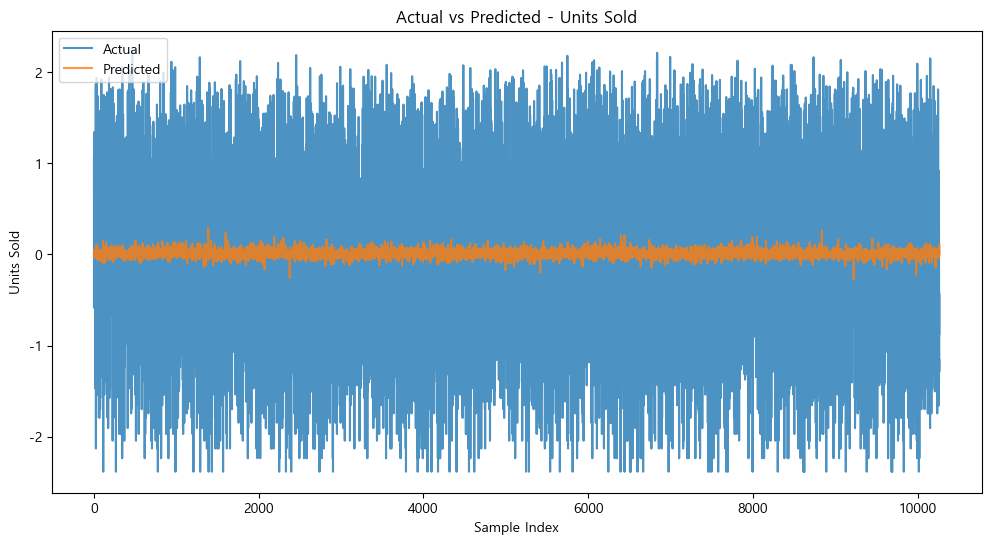

In [630]:
# ÏòàÏ∏° Í≤∞Í≥º ÏãúÍ∞ÅÌôî
plt.figure(figsize=(12,6))
plt.plot(y_test.values, label="Actual", alpha=0.8)
plt.plot(y_pred, label="Predicted", alpha=0.8)
plt.legend()
plt.title("Actual vs Predicted - Units Sold")
plt.xlabel("Sample Index")
plt.ylabel("Units Sold")
plt.show()

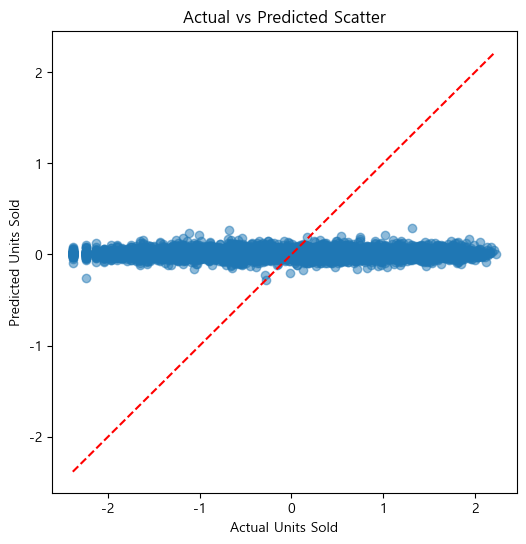

In [632]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # y=x Í∏∞Ï§ÄÏÑ†
plt.xlabel("Actual Units Sold")
plt.ylabel("Predicted Units Sold")
plt.title("Actual vs Predicted Scatter")
plt.show()

- Î≥ÄÏàò Ï§ëÏöîÎèÑ

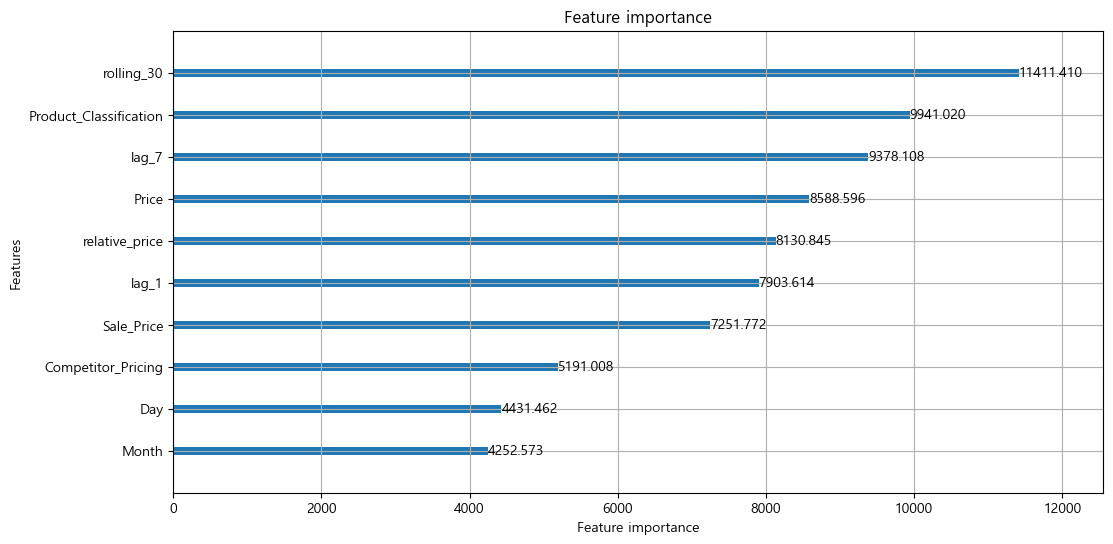

In [637]:
# importance_type='split': 7Ïù¥Î©¥ 7Î≤àÏùò Ìä∏Î¶¨ Î∂ÑÌï†ÏóêÏÑú Ï§ëÏöîÌïú Ïó≠Ìï†ÏùÑ Ìï®.
# importance_type='gain': ÌîºÏ≤òÍ∞Ä Í∞êÏÜåÏãúÌÇ® ÏÜêÏã§Ïùò Ìï©.
lgb.plot_importance(model, max_num_features=10, importance_type='gain', figsize=(12,6)) 
plt.show()

#### XGBoost

In [638]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

label_df = last_df.copy()
object_cols = label_df.select_dtypes(include='object').columns

# Í∞Å Ïó¥Ïóê ÎåÄÌï¥ ÎùºÎ≤® Ïù∏ÏΩîÎî© Ï†ÅÏö©
encoders = {}  # Ïª¨ÎüºÎ≥Ñ LabelEncoder Ï†ÄÏû• ÎîïÏÖîÎÑàÎ¶¨
for col in object_cols:
    le = LabelEncoder()
    label_df[col] = le.fit_transform(label_df[col])
    encoders[col] = le

label_df

Year  Month  Day  Product Classification  Category  Region  Price  \
0      2022      1   17                      92         4       1  66.65   
1      2022      1   17                      63         3       3  17.02   
2      2022      1   17                      10         0       2  70.44   
3      2022      1   17                      71         3       1  82.36   
4      2022      1   18                      82         4       0  82.71   
...     ...    ...  ...                     ...       ...     ...    ...   
68420  2024      1    1                      55         2       0  73.73   
68421  2024      1    1                      96         4       1  82.57   
68422  2024      1    1                      17         0       3  11.11   
68423  2024      1    1                      98         4       0  53.14   
68424  2024      1    1                      79         3       0  78.39   

       Discount  Weather Condition  Holiday/Promotion  Competitor Pricing  \
0            20                  3                  1               66.90   
1            20                  2                  0               20.09   
2             5                  1                  0               67.66   
3             0                  2                  1               85.31   
4            15                  3                  0               86.78   
...         ...                ...                ...                 ...   
68420        20                  2                  0               72.45   
68421        10                  0                  0               83.78   
68422        10                  1                  0               10.91   
68423        20                  1                  0               55.80   
68424        20                  1                  1               79.52   

       Weekday  Season  Sale Price  relative_price  lag_1  lag_7  rolling_30  \
0            1       3     53.3200           -0.20   80.0   42.0  141.033333   
1            1       3     13.6160           -0.32  105.0   88.0  132.033333   
2            1       3     66.9180           -0.01  329.0  143.0  136.566667   
3            1       3     82.3600           -0.03   49.0  171.0  121.633333   
4            5       3     70.3035           -0.19   61.0   65.0  149.400000   
...        ...     ...         ...             ...    ...    ...         ...   
68420        1       3     58.9840           -0.19   13.0   63.0  131.300000   
68421        1       3     74.3130           -0.11  104.0    3.0  123.000000   
68422        1       3      9.9990           -0.08  111.0  265.0  124.866667   
68423        1       3     42.5120           -0.24   17.0   27.0  118.733333   
68424        1       3     62.7120           -0.21   56.0   30.0  115.766667   

       Units Sold_YJ  
0           0.216682  
1           0.416323  
2          -0.469258  
3          -0.525560  
4          -1.502766  
...              ...  
68420       0.160983  
68421      -1.090474  
68422       1.933514  
68423      -1.744408  
68424       1.920197  

[68425 rows x 19 columns]

In [639]:
import xgboost
from xgboost import plot_importance, XGBRegressor

X = label_df.drop(columns=['Units Sold_YJ'])  # ÏÑ§Î™Ö Î≥ÄÏàò
y = label_df['Units Sold_YJ']                 # ÌÉÄÍ≤ü Î≥ÄÏàò


# 1Ï∞®: train / temp (train 70%, temp 30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)

xgb_model = xgboost.XGBRegressor(n_estimators=300, # Ìä∏Î¶¨ Í∞úÏàò
                                 learning_rate=0.02,
                                 gamma=0,
                                 subsample=0.75,
                                 colsample_bytree=1,
                                 max_depth=8)


xgb_model.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
             device=None, early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.02, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=8,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=300,
             n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [640]:
y_pred = xgb_model.predict(X_test)
y_pred

array([ 0.08695313,  0.24704427,  0.03012916, ...,  0.08961796,
        0.13532852, -0.07074177], dtype=float32)

In [641]:
# ÌèâÍ∞Ä
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE: {rmse:.2f}')

RMSE: 1.00


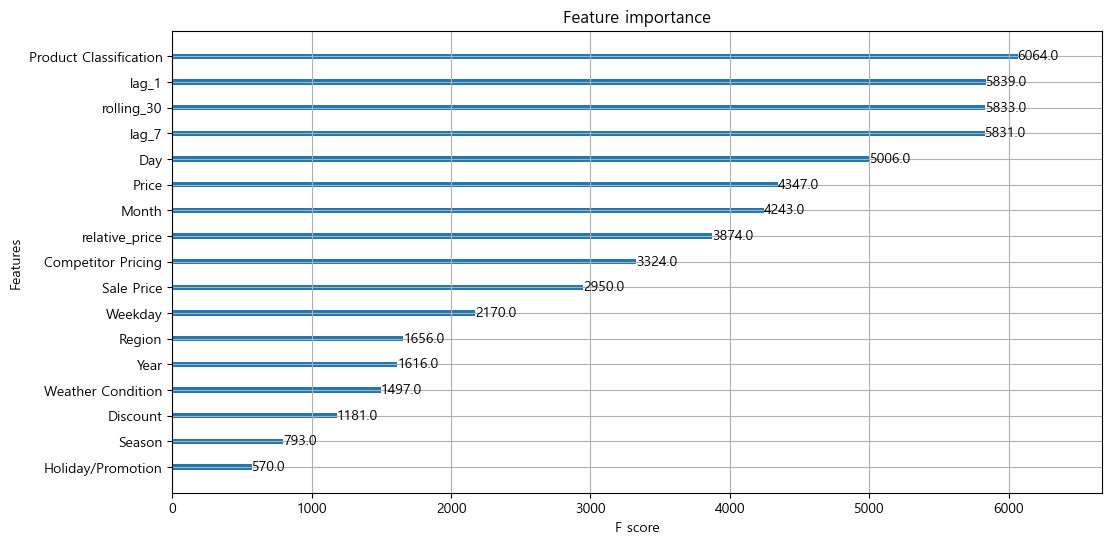

In [649]:
fig, ax = plt.subplots(figsize=(12, 6))  # ÏõêÌïòÎäî ÌÅ¨Í∏∞Î°ú ÏßÄÏ†ï
plot_importance(xgb_model, importance_type='weight', ax=ax)
plt.show()

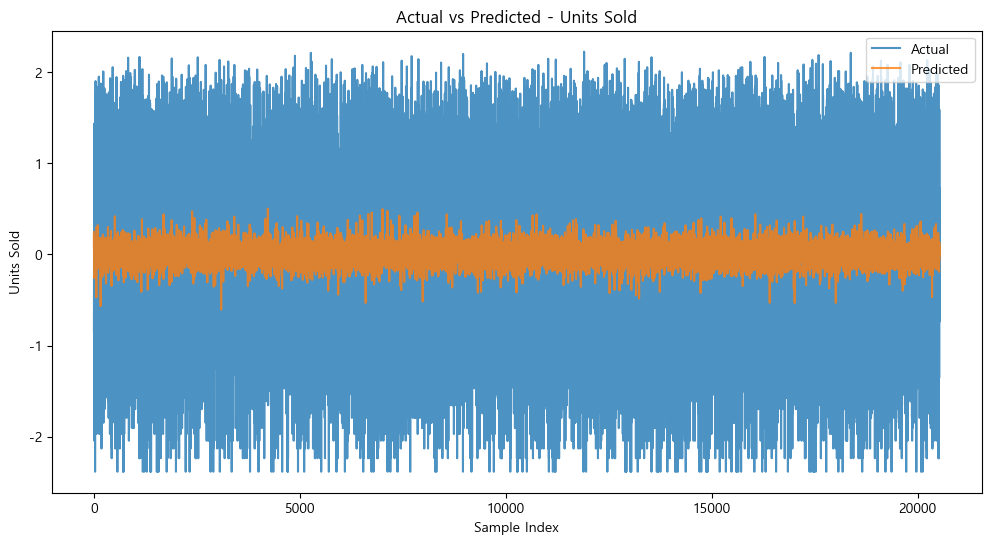

In [605]:
# ÏòàÏ∏° Í≤∞Í≥º ÏãúÍ∞ÅÌôî
plt.figure(figsize=(12,6))
plt.plot(y_test.values, label="Actual", alpha=0.8)
plt.plot(y_pred, label="Predicted", alpha=0.8)
plt.legend()
plt.title("Actual vs Predicted - Units Sold")
plt.xlabel("Sample Index")
plt.ylabel("Units Sold")
plt.show()

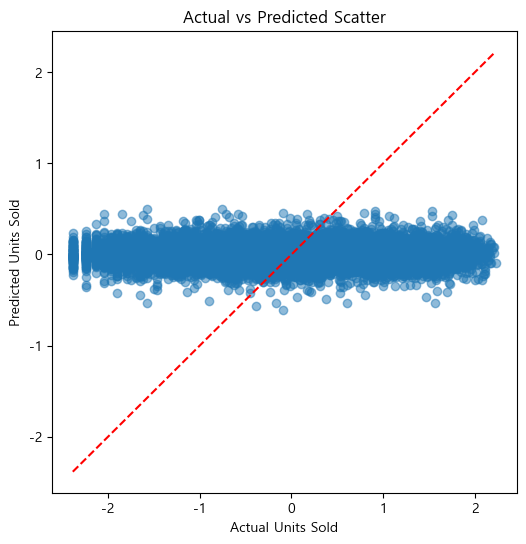

In [606]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # y=x Í∏∞Ï§ÄÏÑ†
plt.xlabel("Actual Units Sold")
plt.ylabel("Predicted Units Sold")
plt.title("Actual vs Predicted Scatter")
plt.show()

### Í∞ÄÍ≤© ÏµúÏ†ÅÌôî

In [607]:
X_test.iloc[0]

Year                      2022.000
Month                       10.000
Day                         22.000
Product Classification      81.000
Category                     4.000
Region                       0.000
Price                       94.560
Discount                    20.000
Weather Condition            1.000
Holiday/Promotion            1.000
Competitor Pricing          98.060
Weekday                      2.000
Season                       0.000
Sale Price                  75.648
relative_price              -0.230
lag_1                      239.000
lag_7                      204.000
rolling_30                 163.300
Name: 25432, dtype: float64

In [608]:
X_test.iloc[0]['Product Classification']

81.0

In [609]:
le = encoders['Product Classification']
val = int(X_test.iloc[0]['Product Classification'])
decoded_val = le.inverse_transform([val])[0]
decoded_val

'Toys_P0002'

In [610]:
avg_price = filtered_df[filtered_df['Product Classification'] == decoded_val]['Sale Price'].mean()
np.round(np.arange(avg_price*0.8, avg_price*1.2+1, avg_price*0.02), 2)

array([40.48, 41.49, 42.5 , 43.51, 44.52, 45.54, 46.55, 47.56, 48.57,
       49.58, 50.59, 51.61, 52.62, 53.63, 54.64, 55.65, 56.67, 57.68,
       58.69, 59.7 , 60.71])

In [611]:
def generate_scenarios(base_row, competitor_pricing):

    # ÎùºÎ≤® Ïù∏ÏΩîÎî©Îêú Í∞í Îã§Ïãú ÎêòÎèåÎ¶¨Í∏∞
    le = encoders['Product Classification']
    val = int(base_row['Product Classification'])
    decoded_val = le.inverse_transform([val])[0]

    # Ìï¥Îãπ Ï†úÌíàÏùò ÌèâÍ∑† Í∞ÄÍ≤©ÏúºÎ°úÎ∂ÄÌÑ∞ ÌõÑÎ≥¥ Í∞ÄÍ≤©ÏùÑ ÎΩëÏïÑÎÉÑ
    avg_price = filtered_df[filtered_df['Product Classification'] == decoded_val]['Sale Price'].mean()
    candidate_prices = np.round(np.arange(avg_price*0.8, avg_price*1.2+1, avg_price*0.02), 2)

    row = []
    for p in candidate_prices:
        r = base_row.copy()
        r['Sale Price'] = p

        r['Discount'] = (r['Price']-p) /r['Price']
        r['Competitor Pricing'] = competitor_pricing

        # Í≤ΩÏüÅÏÇ¨ Í∞ÄÍ≤©ÏùÄ Ïô∏Î∂Ä ÏãúÏä§ÌÖúÏóê ÏùòÌï¥ ÏûêÎèôÏúºÎ°ú ÏàòÏßëÌïòÍ≥† ÏûÖÎ†•ÎêúÎã§Í≥† Í∞ÄÏ†ïÌï®.
        r['relative_price'] = (p - r['Competitor Pricing'])/r['Competitor Pricing']
        row.append(r)
    return pd.DataFrame(row)


In [612]:
# Í≤ΩÏüÅÏÇ¨ Í∞ÄÍ≤© ÏûÑÏùò ÏßÄÏ†ï
competitor_pricing = 27.250000

# Í≥†Í∞ù ÏûÖÎ†• ÎåÄÏã† test Îç∞Ïù¥ÌÑ∞ Ï§ë ÌïúÍ∞ú ÏÇ¨Ïö©
base_row = X_test.iloc[0]

scenario_df = generate_scenarios(base_row, competitor_pricing)

In [613]:
scenario_df

Year  Month   Day  Product Classification  Category  Region  Price  \
25432  2022.0   10.0  22.0                    81.0       4.0     0.0  94.56   
25432  2022.0   10.0  22.0                    81.0       4.0     0.0  94.56   
25432  2022.0   10.0  22.0                    81.0       4.0     0.0  94.56   
25432  2022.0   10.0  22.0                    81.0       4.0     0.0  94.56   
25432  2022.0   10.0  22.0                    81.0       4.0     0.0  94.56   
25432  2022.0   10.0  22.0                    81.0       4.0     0.0  94.56   
25432  2022.0   10.0  22.0                    81.0       4.0     0.0  94.56   
25432  2022.0   10.0  22.0                    81.0       4.0     0.0  94.56   
25432  2022.0   10.0  22.0                    81.0       4.0     0.0  94.56   
25432  2022.0   10.0  22.0                    81.0       4.0     0.0  94.56   
25432  2022.0   10.0  22.0                    81.0       4.0     0.0  94.56   
25432  2022.0   10.0  22.0                    81.0       4.0     0.0  94.56   
25432  2022.0   10.0  22.0                    81.0       4.0     0.0  94.56   
25432  2022.0   10.0  22.0                    81.0       4.0     0.0  94.56   
25432  2022.0   10.0  22.0                    81.0       4.0     0.0  94.56   
25432  2022.0   10.0  22.0                    81.0       4.0     0.0  94.56   
25432  2022.0   10.0  22.0                    81.0       4.0     0.0  94.56   
25432  2022.0   10.0  22.0                    81.0       4.0     0.0  94.56   
25432  2022.0   10.0  22.0                    81.0       4.0     0.0  94.56   
25432  2022.0   10.0  22.0                    81.0       4.0     0.0  94.56   
25432  2022.0   10.0  22.0                    81.0       4.0     0.0  94.56   

       Discount  Weather Condition  Holiday/Promotion  Competitor Pricing  \
25432  0.571912                1.0                1.0               27.25   
25432  0.561231                1.0                1.0               27.25   
25432  0.550550                1.0                1.0               27.25   
25432  0.539869                1.0                1.0               27.25   
25432  0.529188                1.0                1.0               27.25   
25432  0.518401                1.0                1.0               27.25   
25432  0.507720                1.0                1.0               27.25   
25432  0.497039                1.0                1.0               27.25   
25432  0.486358                1.0                1.0               27.25   
25432  0.475677                1.0                1.0               27.25   
25432  0.464996                1.0                1.0               27.25   
25432  0.454209                1.0                1.0               27.25   
25432  0.443528                1.0                1.0               27.25   
25432  0.432847                1.0                1.0               27.25   
25432  0.422166                1.0                1.0               27.25   
25432  0.411485                1.0                1.0               27.25   
25432  0.400698                1.0                1.0               27.25   
25432  0.390017                1.0                1.0               27.25   
25432  0.379336                1.0                1.0               27.25   
25432  0.368655                1.0                1.0               27.25   
25432  0.357974                1.0                1.0               27.25   

       Weekday  Season  Sale Price  relative_price  lag_1  lag_7  rolling_30  
25432      2.0     0.0       40.48        0.485505  239.0  204.0       163.3  
25432      2.0     0.0       41.49        0.522569  239.0  204.0       163.3  
25432      2.0     0.0       42.50        0.559633  239.0  204.0       163.3  
25432      2.0     0.0       43.51        0.596697  239.0  204.0       163.3  
25432      2.0     0.0       44.52        0.633761  239.0  204.0       163.3  
25432      2.0     0.0       45.54        0.671193  239.0  204.0       163.3  
25432      2.0     0.0

In [614]:
pred_quantity = xgb_model.predict(scenario_df)

In [615]:
pred_quantity

array([-0.13097315, -0.03684079, -0.01049866, -0.1049113 ,  0.06002308,
        0.07685834,  0.08391667,  0.08391667,  0.08391667,  0.01223969,
       -0.01848665, -0.01270754, -0.01631209, -0.04816117, -0.04937803,
       -0.05100192, -0.05100192, -0.05100192, -0.05100192, -0.05100192,
       -0.0643577 ], dtype=float32)

In [616]:
# np.expm1(pred_quantity)

In [617]:
# result = np.round(scenario_df['Sale Price'] * np.expm1(pred_quantity), 1)
pred_quantity_original = pt.inverse_transform(pred_quantity.reshape(-1, 1)).flatten()
result = np.round(scenario_df['Sale Price'] * pred_quantity_original,1)
max_pos = np.argmax(result)
max_pos

c:\Users\Paris\miniconda3\envs\ds_study\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(


20

#### ÏµúÏ¢Ö ÏãúÎÇòÎ¶¨Ïò§

In [618]:
filtered_df.head(2)

Date  Year  Month  Day Product Classification   Category Region  \
0 2022-01-17  2022      1   17             Toys_P0013       Toys  North   
1 2022-01-17  2022      1   17        Groceries_P0004  Groceries   West   

   Price  Discount Weather Condition  Holiday/Promotion  Competitor Pricing  \
0  66.65        20             Sunny                  1               66.90   
1  17.02        20             Snowy                  0               20.09   

  Weekday  Season  Sale Price  relative_price  lag_1  lag_7  rolling_30  \
0  Monday  Winter      53.320           -0.20   80.0   42.0  141.033333   
1  Monday  Winter      13.616           -0.32  105.0   88.0  132.033333   

   Units Sold_YJ  
0       0.216682  
1       0.416323

In [619]:
X_test.iloc[0]

Year                      2022.000
Month                       10.000
Day                         22.000
Product Classification      81.000
Category                     4.000
Region                       0.000
Price                       94.560
Discount                    20.000
Weather Condition            1.000
Holiday/Promotion            1.000
Competitor Pricing          98.060
Weekday                      2.000
Season                       0.000
Sale Price                  75.648
relative_price              -0.230
lag_1                      239.000
lag_7                      204.000
rolling_30                 163.300
Name: 25432, dtype: float64

In [620]:
from datetime import datetime, timedelta

# Ï†úÌíà ÎùºÎ≤®Îêú Í∞í ÏõêÎûòÎåÄÎ°ú Î≥ÄÌôò
le = encoders['Product Classification']
val = int(base_row['Product Classification'])
decoded_val = le.inverse_transform([val])[0]

# X_test Í∏∞Ï§Ä ÎÇ†Ïßú ÎßåÎì§Í∏∞
current_date = datetime(
    int(X_test.iloc[0]['Year']),
    int(X_test.iloc[0]['Month']),
    int(X_test.iloc[0]['Day'])
)

# 3Í∞úÏõî Ï†Ñ ÎÇ†Ïßú Í≥ÑÏÇ∞
three_months_ago = current_date - pd.DateOffset(months=3)

# filtered_df['Date']: ÎÇ†ÏßúÌòïÏãù ÏïÑÎãåÍ≤ΩÏö∞ ÎåÄÎπÑ 
filtered_df['Date'] = pd.to_datetime(filtered_df['Date'])

# Ìï¥Îãπ Ï†úÌíàÏùò ÌèâÍ∑† Í∞ÄÍ≤©ÏúºÎ°úÎ∂ÄÌÑ∞ ÌõÑÎ≥¥ Í∞ÄÍ≤©ÏùÑ ÎΩëÏïÑÎÉÑ
avg_price = filtered_df.loc[(filtered_df['Product Classification'] == decoded_val)&
                            (filtered_df['Date'] >= three_months_ago)&
                            (filtered_df['Date'] <= current_date), 'Sale Price'].mean()
scenario_df.iloc[max_pos]['Sale Price']

60.71

In [621]:
def recommend_price(origin_df, base_row, competitor_pricing):
    scenario_df = generate_scenarios(base_row, competitor_pricing)

    le = encoders['Product Classification']
    val = int(base_row['Product Classification'])
    decoded_val = le.inverse_transform([val])[0]

    # X_test Í∏∞Ï§Ä ÎÇ†Ïßú ÎßåÎì§Í∏∞
    current_date = datetime(
        int(base_row['Year']),
        int(base_row['Month']),
        int(base_row['Day'])
    )

    # 3Í∞úÏõî Ï†Ñ ÎÇ†Ïßú Í≥ÑÏÇ∞
    three_months_ago = current_date - pd.DateOffset(months=3)

    # filtered_df['Date']: ÎÇ†ÏßúÌòïÏãù ÏïÑÎãåÍ≤ΩÏö∞ ÎåÄÎπÑ 
    origin_df['Date'] = pd.to_datetime(filtered_df['Date'])

    # Ìï¥Îãπ Ï†úÌíàÏùò ÌèâÍ∑† Í∞ÄÍ≤©ÏúºÎ°úÎ∂ÄÌÑ∞ ÌõÑÎ≥¥ Í∞ÄÍ≤©ÏùÑ ÎΩëÏïÑÎÉÑ
    avg_price = origin_df.loc[(origin_df['Product Classification'] == decoded_val)&
                                (origin_df['Date'] >= three_months_ago)&
                                (origin_df['Date'] <= current_date), 'Sale Price'].mean()

    result = np.round(scenario_df['Sale Price'] * np.expm1(pred_quantity), 1)
    max_pos = np.argmax(result)
    recommend_price = scenario_df.iloc[max_pos]['Sale Price']

    return print(f'3Í∞úÏõî ÌèâÍ∑† ÌåêÎß§ Í∞ÄÍ≤©ÏùÄ {round(avg_price, 2)} Îã¨Îü¨ÏóêÏöî ü§©\nÎ∂ÑÏÑù Í≤∞Í≥º ÏµúÏ†Å Îß§Ï∂úÏùÑ ÏúÑÌïú Ï∂îÏ≤ú ÌåêÎß§ Í∞ÄÍ≤©ÏùÄ {recommend_price} Îã¨Îü¨ÏûÖÎãàÎã§üöÄ')

In [622]:
# Í≤ΩÏüÅÏÇ¨ Í∞ÄÍ≤© ÏûÑÏùò ÏßÄÏ†ï
competitor_pricing = 27.250000

# Í≥†Í∞ù ÏûÖÎ†• ÎåÄÏã† test Îç∞Ïù¥ÌÑ∞ Ï§ë ÌïúÍ∞ú ÏÇ¨Ïö©
base_row = X_test.iloc[0]

# ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞Îäî Ï†úÌíà Íµ¨Î∂Ñ Ïª¨ÎüºÏù¥ ÏóÜÏñ¥ filtered_df Îç∞Ïù¥ÌÑ∞ÏÖã ÏÇ¨Ïö©
recommend_price(filtered_df, base_row, competitor_pricing)

3Í∞úÏõî ÌèâÍ∑† ÌåêÎß§ Í∞ÄÍ≤©ÏùÄ 49.35 Îã¨Îü¨ÏóêÏöî ü§©
Î∂ÑÏÑù Í≤∞Í≥º ÏµúÏ†Å Îß§Ï∂úÏùÑ ÏúÑÌïú Ï∂îÏ≤ú ÌåêÎß§ Í∞ÄÍ≤©ÏùÄ 48.57 Îã¨Îü¨ÏûÖÎãàÎã§üöÄ
